In [1]:
import pandas as pd

# Exportamos datos

data_xy = pd.read_csv('csv/DataFinal.csv')

# 1. Preprocesado de los datos

Mapeamos los valores de posiciones a valores numéricos.

In [2]:
unique_values = data_xy['Posicion'].unique()
print(unique_values)

['DL' 'DF' 'CC,DL' 'DL,CC' 'DF,CC' 'CC' 'CC,DF' 'PO' 'DF,DL' 'DL,DF']


La idea es crear cuatro variables binarias nuevas, que indiquen si el jugador juega o no es esa posición.

In [3]:
# Codificamos las posiciones
data_xy['Posicion_1'] = data_xy['Posicion'].str.contains('PO') # Verdadero si el jugador es portero
data_xy['Posicion_2'] = data_xy['Posicion'].str.contains('DF') # Verdadero si el jugador es defensa
data_xy['Posicion_3'] = data_xy['Posicion'].str.contains('CC') # Verdadero si el jugador es centrocampista
data_xy['Posicion_4'] = data_xy['Posicion'].str.contains('DL') # Verdadero si el jugador es delantero

data_xy.head()

,Jugador,Edad,Temporada,Posicion,Valor liga ini,Partidos,Titularidades,Minutos,Goles,Asistencias,...,Salario semanal,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin,Posicion_1,Posicion_2,Posicion_3,Posicion_4
0,Aaron Connolly,19.0,2019,DL,5123.0,24.0,14.0,1258.0,3.0,1.0,...,31990.0,5123.0,15.0,15.0,200.78,200.78,False,False,False,True
1,Adam Webster,24.0,2019,DF,5123.0,31.0,31.0,2668.0,3.0,1.0,...,48519.0,5123.0,15.0,15.0,200.78,200.78,False,True,False,False
2,Alexis Mac Allister,20.0,2019,"CC,DL",5123.0,9.0,4.0,352.0,0.0,0.0,...,42653.0,5123.0,15.0,15.0,200.78,200.78,False,False,True,True
3,Alireza Jahanbakhsh,25.0,2019,"DL,CC",5123.0,10.0,3.0,311.0,2.0,0.0,...,69312.0,5123.0,15.0,15.0,200.78,200.78,False,False,True,True
4,Bernardo,24.0,2019,"DF,CC",5123.0,14.0,7.0,679.0,0.0,0.0,...,34656.0,5123.0,15.0,15.0,200.78,200.78,False,True,True,False


In [4]:
nombres_de_columnas = data_xy.columns
nombres_de_columnas


Index(['Jugador', 'Edad', 'Temporada', 'Posicion', 'Valor liga ini',
       'Partidos', 'Titularidades', 'Minutos', 'Goles', 'Asistencias',
       'Goles penalti', 'Penaltis lanzados', 'Amarillas', 'Rojas', 'xG',
       'xG sin penaltis', 'xAG', 'Conducciones progresivas',
       'Pases progresivos', 'Pases progresivos recibidos', 'Goles encajados',
       'Disparos recibidos', 'Salvadas', 'Porterias a cero',
       'Penaltis en contra', 'Penaltis encajados', 'Penaltis detenidos',
       'Penaltis fallados (en contra)', '2a amarilla', 'Faltas cometidas',
       'Faltas recibidas', 'Fueras de juego', 'Balones centrados',
       'Intercepciones', 'Entradas ganadas', 'Penaltis concedidos',
       'Goles en propia', 'Recuperaciones', 'Aereos ganados',
       'Aereos perdidos', 'Disparos', 'Tiros a puerta', 'Distancia tiros',
       'Faltas lanzadas', 'Pases completados', 'Pases intentados',
       'Distancia pases', 'Dist progresiva pases', 'Pases cortos completados',
       'Pases cortos 

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split # para dividir el dataset en los conjuntos de train y test

x = data_xy.drop(['Jugador', 'Temporada', 'Salario semanal', 'Posicion'], axis=1)
y = data_xy['Salario semanal']

print("El número de instancias del problema es: " + str(x.shape[0]))

print("El número de características del problema es: " + str(x.shape[1]))

# Capturamos los índices de las características continuas y categóricas
categoricas_indices = ['Posicion_1', 'Posicion_2', 'Posicion_3', 'Posicion_4']
continuas_indices = [col for col in x.columns if col not in categoricas_indices]

El número de instancias del problema es: 10786
El número de características del problema es: 73


# 2. Análisis de los datos

Separamos en test y train para evitar data snooping.

In [6]:
# Antes de cualquier visualización separamos en entrenamiento y test (para no hacer nada con test y evitar el data snooping)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Visualizamos los datos de entrenamiento
print('El número de instancias para el entrenamiento es: ', x_train.shape[0])
print('El número de instancias para el test es: ' , x_test.shape[0])

El número de instancias para el entrenamiento es:  9707
El número de instancias para el test es:  1079


Como tenemos un dataset de tamaño medio selecciono el 10% de la muestra para test, para así tener una buena cantidad de datos para entrenar nuestros modelos y bastantes datos para luego comprobar como funcionaría el modelo elegido para datos de fuera de la muestra.

Resumen de los datos.

In [7]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo, mínimo y valores faltantes
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo', 'Valores Faltantes'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

print("TABLA RESUMEN DE LAS VARIABLES CATEGÓRICAS\n")
# Calcular el número de ejemplos, rango de valores y valores faltantes
resultados = pd.DataFrame(columns=['Número de Ejemplos', 'Rango de Valores', 'Valores Faltantes'])
for columna in categoricas_indices:
    numero_ejemplos = x_train[columna].count()
    rango_valores = f"{x_train[columna].min()} - {x_train[columna].max()}"
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [numero_ejemplos, rango_valores, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados)

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

                                  Media  Mediana  Desviación Típica   Máximo  Mínimo  Valores Faltantes
Edad                              25.32     25.0               4.27     41.0    15.0                0.0
Valor liga ini                  3328.69   3114.0            1439.90   6605.0  1598.0                0.0
Partidos                          22.90     25.0              10.40     50.0     1.0                0.0
Titularidades                     18.03     18.0              10.94     38.0     0.0                0.0
Minutos                         1610.47   1627.0             939.94   3420.0     1.0                0.0
Goles                              2.36      1.0               3.85     41.0     0.0                0.0
Asistencias                        1.63      1.0               2.28     21.0     0.0                0.0
Goles penalti                      0.22      0.0               0.87     14.0     0.0                0.0
Penaltis lanzados     

Respecto a los datos continuos, podemos observar por un lado que algunas variables tienen intervalos muy grandes, convendría escalarlos para facilitar el trabajo de los modelos de aprendizaje, en especial modelos como KNN que trabajan con las distancias entre puntos. Por otro lado podemos observar también que no existen datos faltantes.

En cuanto a las variables categóricas observamos simplemente el resultado de haber aplicado dummy encoding a las mismas, nos ha creado una serie de variables binarias donde se almacena la información acerca de posición y competiciones del jugador en cuestión.

Histograma con la cantidad de jugadores por posición.

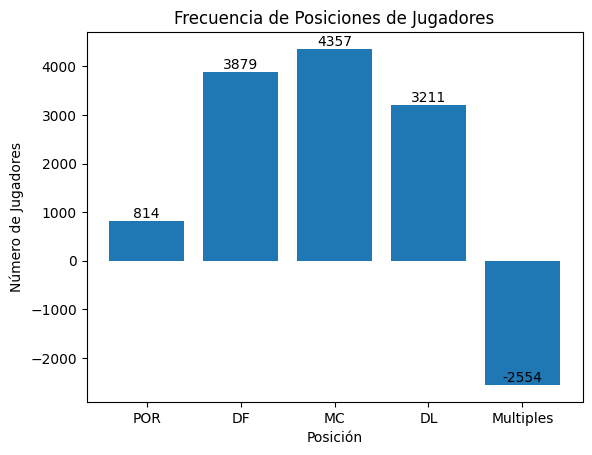

In [8]:
import matplotlib.pyplot as plt

# Calcular la cantidad de jugadores por posición
frecuencia_posiciones = x_train[['Posicion_1', 'Posicion_2', 'Posicion_3', 'Posicion_4']].sum(axis=0)

# Agregar una barra para jugadores con múltiples posiciones
frecuencia_posiciones['Múltiple'] = len(x_train) - frecuencia_posiciones.sum()

# Crear una figura y un eje
fig, ax = plt.subplots()
tags = ['POR', 'DF', 'MC', 'DL', 'Multiples']

# Añadir barras al gráfico
ax.bar(tags, frecuencia_posiciones)

# Configurar etiquetas y título
ax.set_xlabel('Posición')
ax.set_ylabel('Número de Jugadores')
ax.set_title('Frecuencia de Posiciones de Jugadores')

# Añadir etiquetas con el número exacto de jugadores encima de las barras
for i, count in enumerate(frecuencia_posiciones):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Podemos observar que tenemos una cantidad bastante reducida de porteros y delanteros en comparación con el resto de posiciones, no obstante creo que es una cantidad significativa de muestras.

Distribución de salarios por posición.

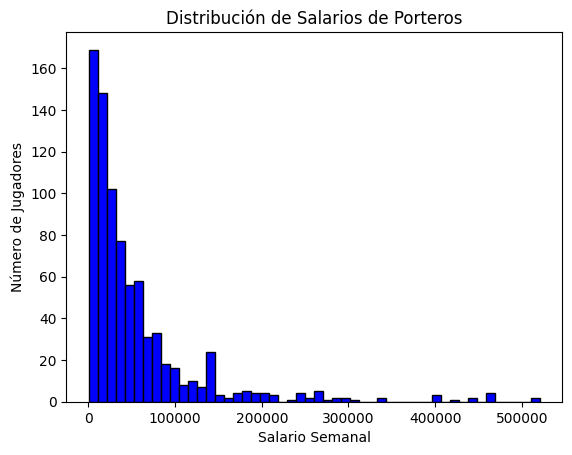

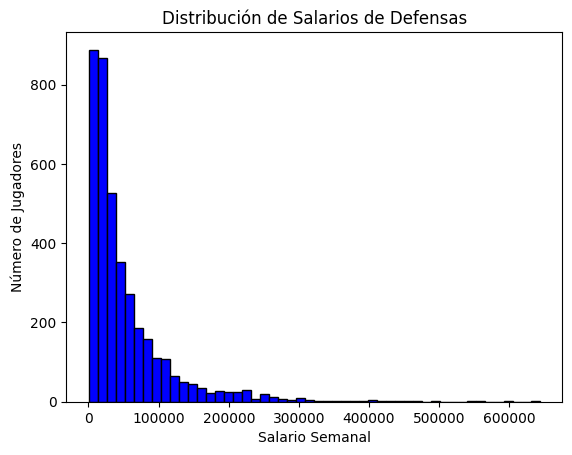

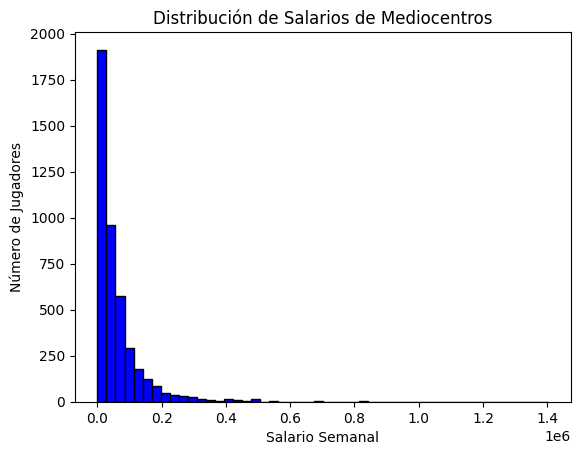

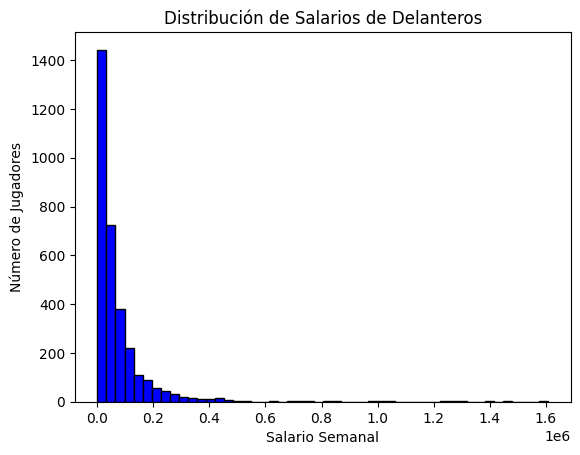

In [9]:
# Índices por posición
c1 = x_train["Posicion_1"]
c2 = x_train["Posicion_2"]
c3 = x_train["Posicion_3"]
c4 = x_train["Posicion_4"]

salarios = y_train

# Crea un histograma de los salarios
# Porteros
plt.hist(salarios[c1], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Porteros')

# Muestra el gráfico
plt.show()

# Defensas
plt.hist(salarios[c2], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Defensas')

# Muestra el gráfico
plt.show()

# Mediocentros
plt.hist(salarios[c3], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Mediocentros')

# Muestra el gráfico
plt.show()

# Delanteros
plt.hist(salarios[c4], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Delanteros')

# Muestra el gráfico
plt.show()

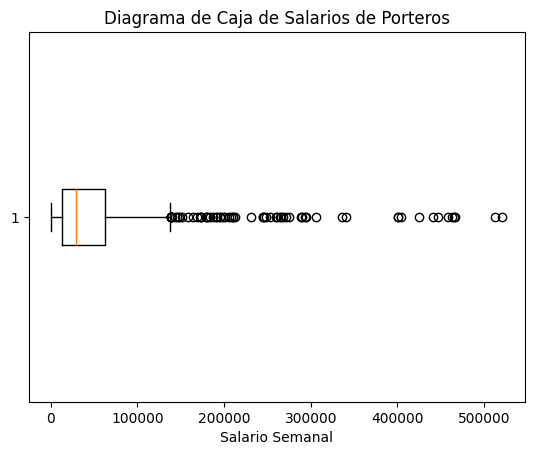

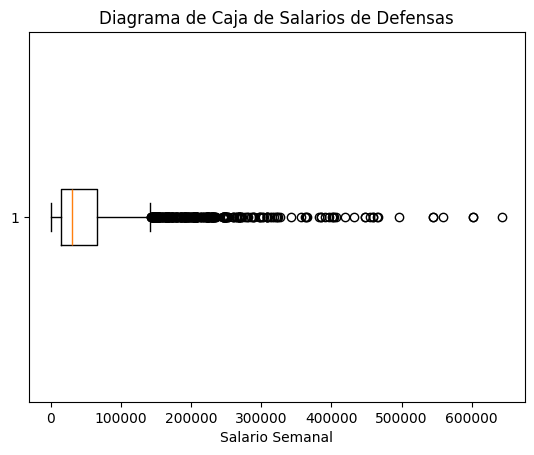

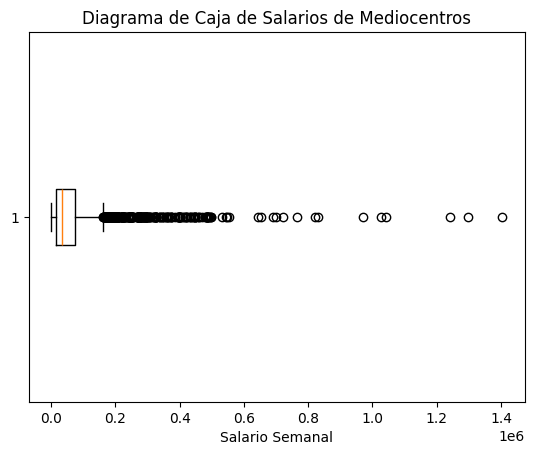

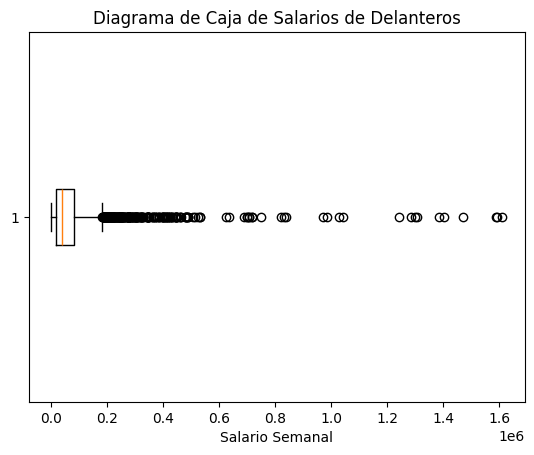

In [10]:
# Crea un diagrama de caja de los salarios
# Porteros
plt.boxplot(salarios[c1], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Porteros')

# Muestra el gráfico
plt.show()

# Defensas
plt.boxplot(salarios[c2], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Defensas')

# Muestra el gráfico
plt.show()

# Mediocentros
plt.boxplot(salarios[c3], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Mediocentros')

# Muestra el gráfico
plt.show()

# Delanteros
plt.boxplot(salarios[c4], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Delanteros')

# Muestra el gráfico
plt.show()

Podemos ver que para todas las posiciones existen salarios que están muy por encima de la media, aunque en distintas magnitudes dependiendo de la posición, vemos que los delanteros son los que más cobran y los porteros los que menos.

In [11]:
# Define las columnas y los índices para el DataFrame
indices = ['Portero', 'Defensa', 'Mediocentro', 'Delantero', 'Total']
columnas = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Crea un DataFrame con los cuartiles
cuartiles_df = pd.DataFrame(index=indices, columns=columnas)

# Llena el DataFrame con los cuartiles
cuartiles_df.loc['Portero', :] = y_train[c1].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Defensa', :] = y_train[c2].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Mediocentro', :] = y_train[c3].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Delantero', :] = y_train[c4].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Total', :] = y_train.describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values

# Muestra el DataFrame
cuartiles_df

,count,mean,std,min,25%,50%,75%,max
Portero,814.0,54690.701474,73521.529488,408.0,12539.0,29295.5,62822.75,520734.0
Defensa,3879.0,52424.114978,64459.253075,296.0,14295.0,30642.0,65292.0,643199.0
Mediocentro,4357.0,61769.732614,88969.670907,296.0,14555.0,34008.0,73454.0,1403262.0
Delantero,3211.0,72927.963563,121360.524781,296.0,16320.5,38001.0,82628.0,1609609.0
Total,9707.0,62053.240754,91731.906291,296.0,14994.0,33812.0,73454.0,1609609.0


Aquí vemos más claro la diferencia del salario máximo entre posiciones, viendolo así observamos que la diferencia entre salarios de porteros, defensas y centrocampistas no es muy grande, al igual que la media, y que verdaderamente la posición más outlier es la de delantero. En cuanto a los jugadores con varias posiciones, al incluir todo tipo de posiciones no es más que una representación del total del conjunto cuyas estadísticas son similares a las del total.

Distribución en cuartiles y de gráfico de barras de la variable a predecir.

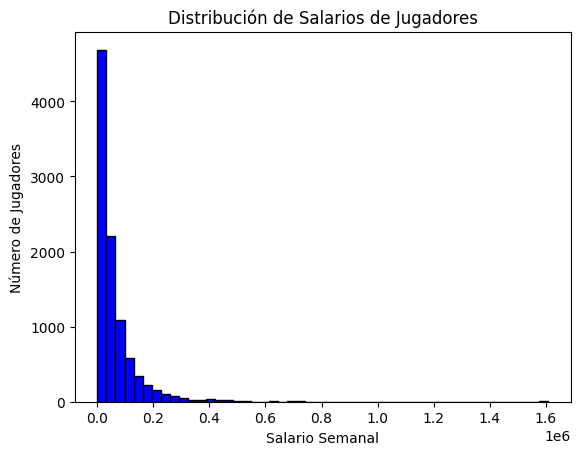

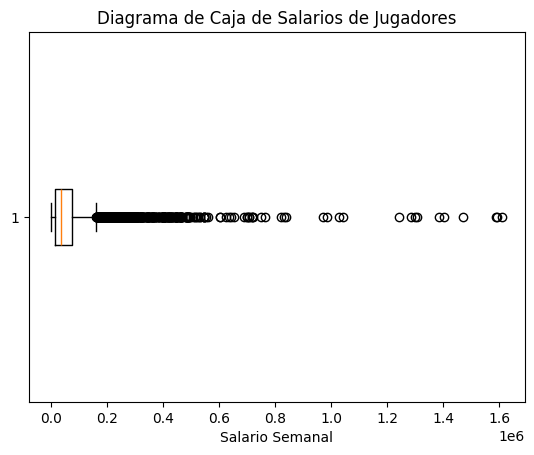

count    9.707000e+03
mean     6.205324e+04
std      9.173191e+04
min      2.960000e+02
25%      1.499400e+04
50%      3.381200e+04
75%      7.345400e+04
max      1.609609e+06
Name: Salario semanal, dtype: float64


In [12]:
# Crea un histograma de los salarios
plt.hist(salarios, bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores')

# Muestra el gráfico
plt.show()


# Crea un diagrama de caja de los salarios
plt.boxplot(salarios, vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Jugadores')

# Muestra el gráfico
plt.show()


# Distribución de cuartiles
cuartiles = y_train.describe(percentiles=[0.25, 0.5, 0.75])

# Muestra la distribución de cuartiles
print(cuartiles)

**Conclusiones**

* Se cumple ley de la potencia, muchos valores pequeños, pero probabilidad de obtener algunos valores muy grandes, como se puede observar en el gráfico de barras o en el de caja.
* Los 3 percentiles están a distancias similares unos de otros, así como con el valor mínimo, hasta aquí bastante balanceados los datos. Existe no obstante una distancia mucho mayor con respecto al máximo.
* Tanto en el diagrama de caja como en el de barras se puede observar fácilmente que existe una cantidad significativa de jugadores con sueldos mucho mayores a los de la mayoría.

Escalamos logarítmicamente la variable a predecir, para paliar el efecto de la cola alargada y mejorar la distribución de valores de la variable.

https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

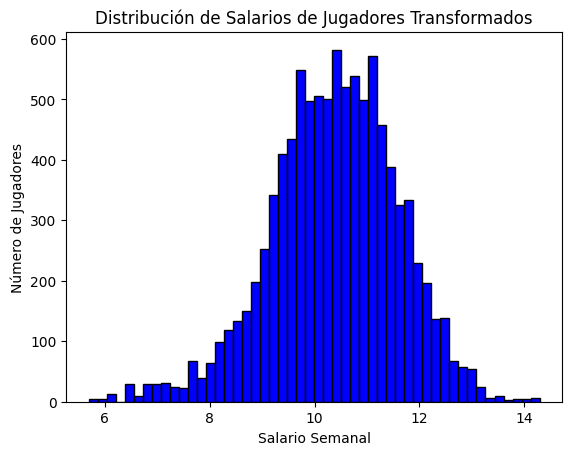

count    9707.000000
mean       10.375689
std         1.211775
min         5.693732
25%         9.615472
50%        10.428601
75%        11.204428
max        14.291502
Name: Salario semanal, dtype: float64


In [13]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Crea un histograma de los salarios
salarios = y_train_log

plt.hist(salarios, bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores Transformados')

# Muestra el gráfico
plt.show()


# Distribución de cuartiles
cuartiles = y_train_log.describe(percentiles=[0.25, 0.5, 0.75])

# Muestra la distribución de cuartiles
print(cuartiles)

Ahora la distribución se asemeja mucho más a la distribución gaussiana, lo que puede ayudar al entrenamiento de los modelos y todos los percentiles están mucho más equilibrados, lo que ayuda a evitar que valores atípicos o extremos influyan más de lo debido en la construcción del modelo.

Observamos distribución de datos antes de tratar.

C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

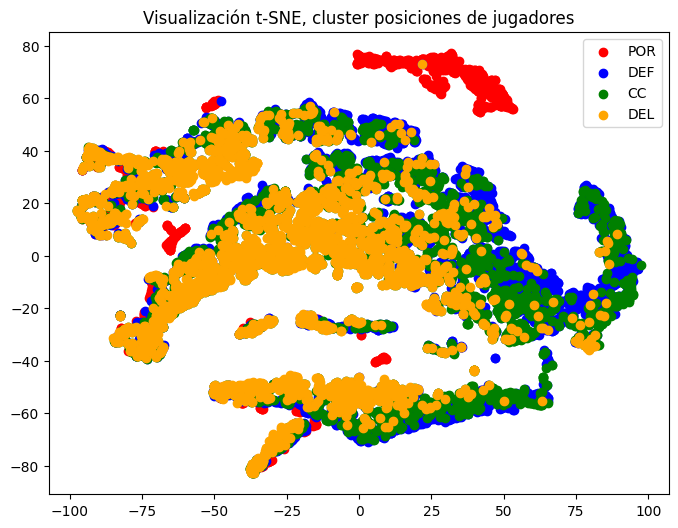

In [14]:
from sklearn.manifold import TSNE

# Creamos un objeto TSNE con el número de componentes deseadas (2D en este caso)
tsne = TSNE(n_components=2, random_state=42)

# Aplicamos t-SNE para reducir la dimensionalidad
X_tsne = tsne.fit_transform(x_train)

# Colores para cada condición
c1 = x_train["Posicion_1"]
c2 = x_train["Posicion_2"]
c3 = x_train["Posicion_3"]
c4 = x_train["Posicion_4"]

plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_1'
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR", c='red')

# Scatter plot para 'Posicion_2'
plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="DEF", c='blue')

# Scatter plot para 'Posicion_3'
plt.scatter(X_tsne[c3 == 1, 0], X_tsne[c3 == 1, 1], label="CC", c='green')

# Scatter plot para 'Posicion_4'
plt.scatter(X_tsne[c4 == 1, 0], X_tsne[c4 == 1, 1], label="DEL", c='orange')

plt.title("Visualización t-SNE, cluster posiciones de jugadores")

# Agregar leyenda
plt.legend(loc="upper right")

plt.show()

Podemos ver que el cluster independiente pertenece a los porteros.

Vamos a ver el cluster solo de porteros para observar más claramente como hay varios conjuntos claramente diferenciados

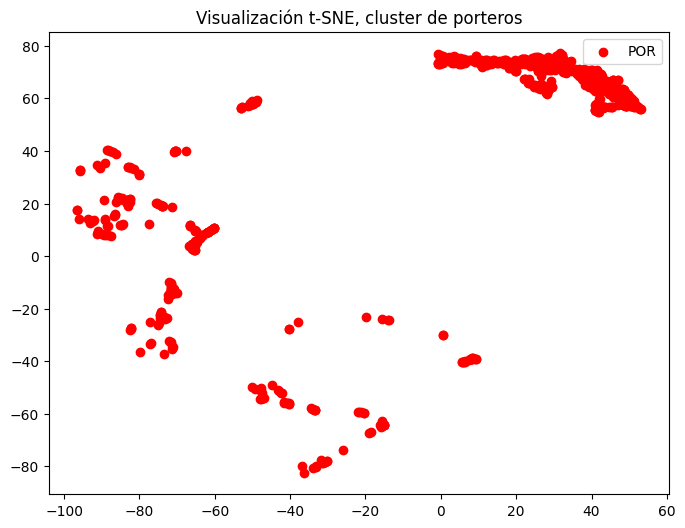

In [15]:
c1 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_1'
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc='upper right')
plt.show()

Observamos un conjunto mayoritario y luego varios porteros más alejados, mi teoría tras haber observado tanto el digrama de caja como los percentiles es que esos porteros separados del cluster corresponden a los que mayor salario tienen, por lo que voy a añadir la condición de que solo se plotteen los porteros con un salario inferior a 300000 euros, que según he visto en el diagrama de barras de los porteros, es más o menos donde empieza el hueco entre el conjunto inferior mayoritario y los porteros que más cobran.

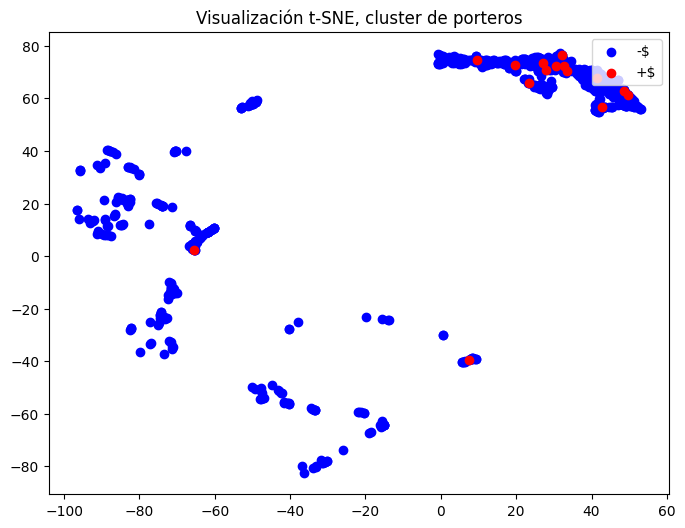

In [16]:
# Nuevas condiciones
c1 = (x_train["Posicion_1"] == 1) & (y_train > 300000)
c2 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

# Scatter plot para porteros que menos cobran
plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="-$", c='blue')
# Scatter plot para porteros que más cobran
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="+$", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc="upper right")
plt.show()

La teoría no era correcta, entiendo entonces que los porteros anómalos son tal debido a que tienen unas estadísticas muy diferenciadas del resto.

Decido entonces volver a mostrar un resumen de los datos, pero solo de los porteros para ver si consigo sacar algo en claro.

In [17]:
# Crear un nuevo DataFrame con los porteros
porteros_df = x_train.loc[x_train['Posicion_1'] == True].copy()

print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo, mínimo y valores faltantes
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo', 'Valores Faltantes'])
for columna in continuas_indices:
    media = round(porteros_df[columna].mean(), 2)
    mediana = round(porteros_df[columna].median(), 2)
    desviacion_tipica = round(porteros_df[columna].std(), 2)
    maximo = round(porteros_df[columna].max(), 2)
    minimo = round(porteros_df[columna].min(), 2)
    valores_faltantes = porteros_df[columna].isnull().sum()
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

print("TABLA RESUMEN DE LAS VARIABLES CATEGÓRICAS\n")
# Calcular el número de ejemplos, rango de valores y valores faltantes
resultados = pd.DataFrame(columns=['Número de Ejemplos', 'Rango de Valores', 'Valores Faltantes'])
for columna in categoricas_indices:
    numero_ejemplos = porteros_df[columna].count()
    rango_valores = f"{porteros_df[columna].min()} - {porteros_df[columna].max()}"
    valores_faltantes = porteros_df[columna].isnull().sum()
    resultados.loc[columna] = [numero_ejemplos, rango_valores, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados)

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

                                  Media   Mediana  Desviación Típica   Máximo  Mínimo  Valores Faltantes
Edad                              27.98     28.00               4.57     41.0    17.0                0.0
Valor liga ini                  3269.88   3073.00            1401.22   6605.0  1598.0                0.0
Partidos                          20.14     23.00              14.04     38.0     1.0                0.0
Titularidades                     19.97     22.00              14.18     38.0     0.0                0.0
Minutos                         1795.84   2046.50            1267.93   3420.0     1.0                0.0
Goles                              0.00      0.00               0.04      1.0     0.0                0.0
Asistencias                        0.05      0.00               0.24      2.0     0.0                0.0
Goles penalti                      0.00      0.00               0.04      1.0     0.0                0.0
Penaltis lanz

Viendo esto vemos que hay porteros que han marcado goles, hecho asistencias o regateado, cosas que son poco comunes y tal vez sea lo que les separe del cluster de porteros, vamos a verlo.

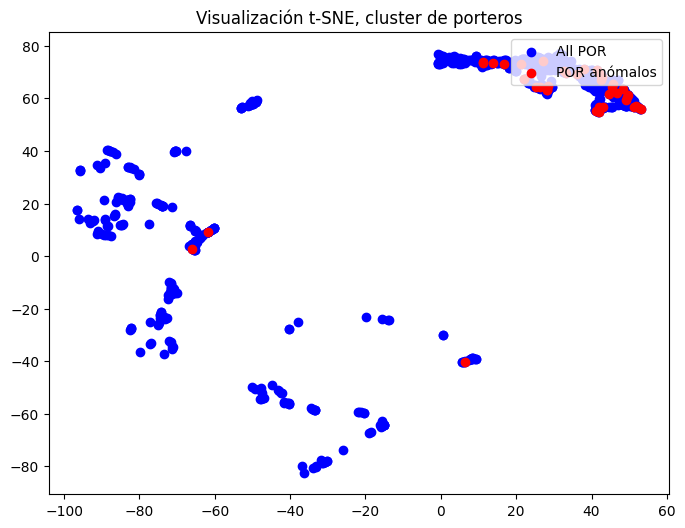

In [18]:
# Nuevas condiciones
c1 = (x_train["Posicion_1"] == 1) & ((x_train['Goles'] > 0) | (x_train['Asistencias'] > 0))
c2 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="All POR", c='blue')
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR anómalos", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc="upper right")
plt.show()

Tampoco es el caso, como no doy con lo que es decido ver a que datos pertenecen esos puntos más alejados para ver como son sus estadísticas, para ello como estos puntos tienen la peculiaridad de que su coordenada x es menor que 0, uso esto para identificarlos.

In [19]:
# Guardamos la coordenada x
x_coord = X_tsne[:, 0]

PORdf = c2.to_frame()
PORdf['X'] = x_coord

# Filtrar las filas que cumplen con las condiciones
indices_filtrados = x_train[(PORdf['X'] < 0) & (PORdf['Posicion_1'] == True)]

# Imprimir los porteros anómalos
indices_filtrados


,Edad,Valor liga ini,Partidos,Titularidades,Minutos,Goles,Asistencias,Goles penalti,Penaltis lanzados,Amarillas,...,Errores de control,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin,Posicion_1,Posicion_2,Posicion_3,Posicion_4
3161,31.0,3208.0,8.0,8.0,720.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3208.0,7.0,7.0,207.60,207.60,True,False,False,False
2092,31.0,2350.0,1.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2350.0,4.0,4.0,642.50,642.50,True,False,False,False
8759,33.0,5498.0,3.0,3.0,270.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5498.0,3.0,3.0,969.65,969.65,True,False,False,False
1261,39.0,6442.0,2.0,2.0,180.0,0.0,0.0,0.0,0.0,1.0,...,0.0,6442.0,15.0,15.0,274.30,274.30,True,False,False,False
655,31.0,2600.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2600.0,5.0,5.0,338.38,338.38,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,23.0,3300.0,7.0,7.0,630.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3300.0,2.0,2.0,923.45,923.45,True,False,False,False
2418,30.0,5498.0,7.0,7.0,630.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5498.0,10.0,11.0,511.20,430.75,True,False,False,False
9396,33.0,3149.0,1.0,1.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3149.0,10.0,10.0,236.80,236.80,True,False,False,False
9781,22.0,3277.0,2.0,2.0,180.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3277.0,1.0,1.0,770.75,770.75,True,False,False,False


Viendo el resultado parece que los porteros anómalos son porteros que han jugado pocos minutos, vamos a comprobarlo.

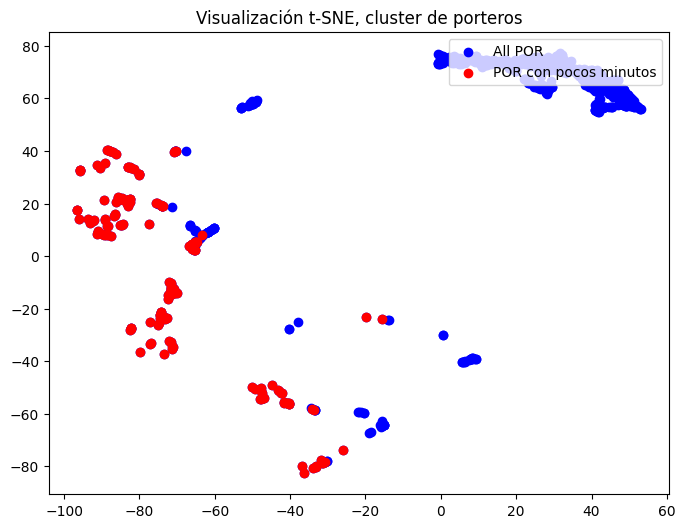

In [20]:
# Nuevas condiciones
c1 = (x_train["Posicion_1"] == 1) & (x_train['Minutos'] < 271)
c2 = x_train["Posicion_1"]

plt.figure(figsize=(8, 6))

plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="All POR", c='blue')
plt.scatter(X_tsne[c1 == 1, 0], X_tsne[c1 == 1, 1], label="POR con pocos minutos", c='red')

plt.title("Visualización t-SNE, cluster de porteros")
plt.legend(loc="upper right")
plt.show()

Queda confirmado que los porteros anómalos son porteros que han jugado pocos minutos, puede que se de el mismo problema para otras posiciones.

A continuación vamos a normalizar los datos. Esto es importante para que estén todos en un mismo rango de valores. La importancia de escalarlos es:

*   Evitar que algunas características dominen sobre otras
*   Mejorar la convergencia en algunos algoritmos como descenso de gradiente

Las variables categóricas ya se mueven en un rango entre 0 y 1 por tanto solo vamos a normalizar las variables continuas. Para ello utilizaremos el método de normalización que consiste en para cada valor x de la columna, restarle el mínimo de la columna y dividir entre el máximo menos el mínimo de la columna:
<center> $z = \frac{{x - x_{min}}}{{x_{max}-x_{min}}}$ </center>

Las variables del test también se normalizan y para ello se utilizan los factores usados en entrenamiento para normalizar.

----

Para estandarizar las variables utilizaremos las siguientes funciones de scikit-learn:

**MinMaxScaler().fit(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se guardan los factores de mínimo y máximo de X en la clase MinMaxScaler

---

**MinMaxScaler().transform(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se transforma X con los factores de mínimo y máximo de la clase MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler # para normalizar

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta el escalador utilizando los datos de train
scaler.fit(x_train[continuas_indices])

# Guardamos el dataset sin normalizar
x_train_noNorm = x_train.copy()

# Escalamos train y test con los factores de train
x_train[continuas_indices] = scaler.transform(x_train[continuas_indices])
x_test[continuas_indices] = scaler.transform(x_test[continuas_indices])

Comprobamos que se ha normalizado bien mediante un resumen de las variables continuas.

In [22]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo y mínimo
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

                               Media  Mediana  Desviación Típica  Máximo  Mínimo
Edad                            0.40     0.38               0.16     1.0     0.0
Valor liga ini                  0.35     0.30               0.29     1.0     0.0
Partidos                        0.45     0.49               0.21     1.0     0.0
Titularidades                   0.47     0.47               0.29     1.0     0.0
Minutos                         0.47     0.48               0.27     1.0     0.0
Goles                           0.06     0.02               0.09     1.0     0.0
Asistencias                     0.08     0.05               0.11     1.0     0.0
Goles penalti                   0.02     0.00               0.06     1.0     0.0
Penaltis lanzados               0.02     0.00               0.07     1.0     0.0
Amarillas                       0.19     0.18               0.17     1.0     0.0
Rojas                           0.04     0.00               0.10   

# 3. Procesado de los datos

En esta ocasión en vez de usar PCA para reducir dimensionalidad, vamos a usar algoritmos de selección de características para reducir la dimensionalidad seleccionando las características más relevantes, compararé los resultados de todos los que use y me quedaré con el subconjunto de características que mejor desempeño tenga.

In [23]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# Definir el objeto KFold con 5 folds
folds = 5
kf = KFold(n_splits=folds)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def crossValidation(model, kFolds, dataset_x, dataset_y, train_stats=False):
  mae = 0
  mse = 0
  r2 = 0
  mae_tr = 0
  mse_tr = 0
  r2_tr = 0

  # Transformar los dataset a numpy
  x = dataset_x
  y = dataset_y.to_numpy()

  for train_index, val_index in kFolds.split(x):
    # Obtener los conjuntos de entrenamiento y validación para cada fold
    train_x_fold, val_x_fold = x[train_index], x[val_index]
    train_y_fold, val_y_fold = y[train_index], y[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(train_x_fold, train_y_fold)

    # Evaluar el desempeño del modelo en el conjunto de validación
    pred_y = model.predict(val_x_fold)

    # Calcular el MSE medio
    mse += mean_squared_error(val_y_fold, pred_y)

    # Calcular el MAE medio
    mae += mean_absolute_error(val_y_fold, pred_y)

    # Calcular el Coeficiente de determinación
    r2 += r2_score(val_y_fold, pred_y)

    # Calcular errores para train
    if train_stats:
      pred_y = model.predict(train_x_fold)

      mse_tr += mean_squared_error(train_y_fold, pred_y)
      mae_tr += mean_absolute_error(train_y_fold, pred_y)
      r2_tr += r2_score(train_y_fold, pred_y)

  if train_stats:
    return model, mse/folds, mae/folds, r2/folds, mse_tr/folds, mae_tr/folds, r2_tr/folds
  else:
    return model, mse/folds, mae/folds, r2/folds

In [24]:
import seaborn as sns

def graficaComparacion(valores, titulos, categorias, titulo='Gráfica comparativa de métricas'):
  sns.set(rc = {'figure.figsize':(10,8)})

  # Configurar los valores de las barras y su posición en el eje x
  num_variables = len(valores)
  x = np.arange(len(categorias))
  ancho_barras = 0.5 / num_variables

  # Crear la figura y los ejes
  fig, ax = plt.subplots()

  # Ir añadiendo las barras de los distintos modelos
  for i in range(num_variables):
    desplazamiento = i * ancho_barras
    barras = ax.bar(x + desplazamiento, valores[i,:], ancho_barras, label=titulos[i])
    for barra in barras:
        altura = round(barra.get_height(), 3)
        if num_variables < 4:
          ax.annotate(altura, xy=(barra.get_x() + barra.get_width() / 2, altura),
                      xytext=(0, 3),  # Desplazamiento de la etiqueta (opcional)
                      textcoords="offset points",
                      ha='center', va='bottom',
                      fontsize=8)

  # Etiquetas de las categorías en el eje x
  ax.set_xticks(np.arange(len(categorias)) + (num_variables - 1) * ancho_barras / 2)
  ax.set_xticklabels(categorias)

  # Leyenda y título del gráfico
  ax.legend()
  plt.title(titulo)

  # Mostrar el gráfico
  plt.show()

In [25]:
from tabulate import tabulate

def tablaComparacion(valores, categorias, titulos, titulo='Métricas de error'):
  # Imprimir la tabla
  metricas = []
  titulos2 = titulos.copy()
  titulos2.insert(0, titulo)
  for i in range(len(valores[0])):
    fila = []
    fila.append(categorias[i])
    for j in range(len(valores)):
      fila.append(valores[j][i])
    metricas.append(fila)

  print(tabulate(metricas, headers=titulos2, tablefmt="fancy_grid"))

### Mutual Information for Feature Selection (MIFS)

El algoritmo MIFS es una técnica de selección de características que se basa en la información mutua entre cada característica y la variable objetivo. La información mutua mide la dependencia entre dos variables y es especialmente útil cuando estas variables son de naturaleza discreta o categórica.

En el contexto de la selección de características, la información mutua se utiliza para cuantificar cuánta información sobre la variable objetivo se puede obtener a partir de cada característica individual. Cuanto mayor sea la información mutua entre una característica y la variable objetivo, más relevante será esa característica para predecir la variable objetivo.

El algoritmo MIFS funciona de la siguiente manera:

Calcula la información mutua entre cada característica y la variable objetivo.
Selecciona un subconjunto de características que maximiza la información mutua colectiva con la variable objetivo.
Utiliza algún criterio de optimización (por ejemplo, un algoritmo de búsqueda) para encontrar este subconjunto de características.

Usamos la implementación del mismo disponible en scikit-learn, para ello usamos la función SelectKBest, que selecciona las k mejores características en base a una función, en nuestro caso MISF, la cual importamos también de scikit-learn llamando a mutual_info_regression.

### Pearson’s r

La correlación de Pearson es una medida de la fuerza y dirección de la relación lineal entre dos variables. Para problemas de regresión, la función r_regression calcula la correlación de Pearson entre cada característica y la variable objetivo.

Es otra de las funciones que probaremos a maximizar en la selección de características.

### F-value

Esta es otra función de puntuación para usar con técnicas de selección de características. Esta función también se utiliza específicamente para problemas de regresión y calcula la estadística F y los p-values asociados entre cada característica y la variable objetivo.

La estadística F se utiliza para probar la hipótesis nula de que la relación entre la variable independiente (característica) y la variable dependiente (variable objetivo) es insignificante. Los p-values proporcionan una medida de la significancia estadística de esta prueba.

In [26]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, r_regression, f_regression

# Creamos y guardamos en una lista los distintos modelos con distintas características a quedarse (k)
Misf = []
PearsonR = []
FValue = []

for k in range(10, 51, 10): # Número de características a seleccionar
    Misf.append(SelectKBest(score_func=mutual_info_regression, k=k)) 
    Misf[-1].fit(x_train, y_train_log)

    PearsonR.append(SelectKBest(score_func=r_regression, k=k)) 
    PearsonR[-1].fit(x_train, y_train_log)

    FValue.append(SelectKBest(score_func=f_regression, k=k)) 
    FValue[-1].fit(x_train, y_train_log)

#x_train_selected = selector.fit_transform(x_train, y_train_log)
#x_test_selected = selector.transform(x_test)
#x_train.columns[selector.get_support()]

Ahora necesitamos comparar los distintos algoritmos de selección de características y seleccionar el mejor, para ello vuelvo a usar CV como en anteriores ocasiones, de nuevo también usaré 5 folds. Lo único que cambia es que he de modificar la anterior función para poder realizar la selección de características y trabajar con ellas.

Como modelo a entrenar para la comparación he seleccionado GradientBoosting sin selección de hiperparámetros, elijo este modelo ya que anteriormente hemos observado que nos da bastante buenos resultados, así como que nos puede proporcionar la explicabilidad de las características, cosa más complicada si uso un MLP por ejemplo.

El único hiperparámetro que marco es el número de estimadores que se generen, lo dejo a 50 ya que en anteriores pruebas he observado que es consistente a la par que veloz.

In [27]:
# Aplicamos CV a nuestros subconjuntos para obtener sus métricas de error
Misf_results = []
PearsonR_results = []
FValue_results = []

for i in range(len(Misf)):
    Misf_results.append(crossValidation(GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34), kf, Misf[i].transform(x_train), y_train_log, False))
    PearsonR_results.append(crossValidation(GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34), kf, PearsonR[i].transform(x_train), y_train_log, False))
    FValue_results.append(crossValidation(GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34), kf, FValue[i].transform(x_train), y_train_log, False))

Misf_all = np.vstack((Misf_results[0][1:], Misf_results[1][1:], Misf_results[2][1:], Misf_results[3][1:], Misf_results[4][1:]))
PearsonR_all = np.vstack((PearsonR_results[0][1:], PearsonR_results[1][1:], PearsonR_results[2][1:], PearsonR_results[3][1:], PearsonR_results[4][1:]))
FValue_all = np.vstack((FValue_results[0][1:], FValue_results[1][1:], FValue_results[2][1:], FValue_results[3][1:], FValue_results[4][1:]))

### Resultados de MISF

╒══════════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ k = Nº características   │   k = 10 │   k = 20 │   k = 30 │   k = 40 │   k = 50 │
╞══════════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ MSE                      │ 0.61541  │ 0.594608 │ 0.468347 │ 0.467326 │ 0.46738  │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ MAE                      │ 0.583909 │ 0.572275 │ 0.516434 │ 0.51562  │ 0.515328 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ R^2                      │ 0.580698 │ 0.594909 │ 0.68102  │ 0.681705 │ 0.681663 │
╘══════════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


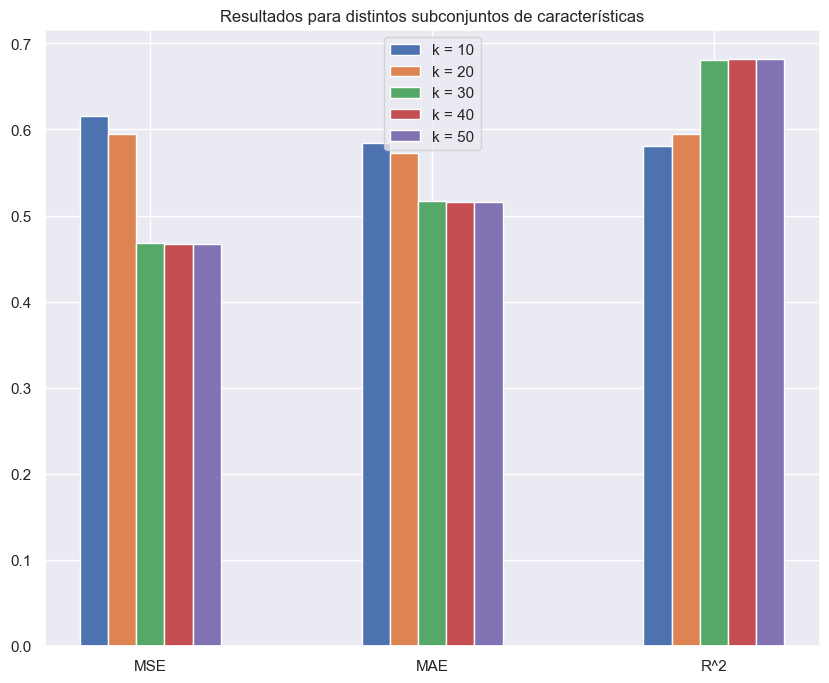

In [28]:
categorias = ['MSE', 'MAE', 'R^2']
titulos = ['k = 10', 'k = 20', 'k = 30', 'k = 40', 'k = 50']

tablaComparacion(Misf_all, categorias, titulos, 'k = Nº características')

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(Misf_all, titulos, categorias, 'Resultados para distintos subconjuntos de características')

Observamos que los mejores resultados los obtenemos cuando nos quedamos con las 30 características más relevantes, una vez se sigue aumentando el número de características a seleccionar los resultados ya se estancan. Por lo que guardamos dicho resultado en una variable.

In [29]:
Mifs_best = Misf[2]

### Resultados de Pearson´s R

╒══════════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ k = Nº características   │   k = 10 │   k = 20 │   k = 30 │   k = 40 │   k = 50 │
╞══════════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ MSE                      │ 0.658549 │ 0.579636 │ 0.467594 │ 0.468925 │ 0.466871 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ MAE                      │ 0.604951 │ 0.563167 │ 0.515889 │ 0.516861 │ 0.514704 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ R^2                      │ 0.551356 │ 0.605135 │ 0.681525 │ 0.680604 │ 0.682014 │
╘══════════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


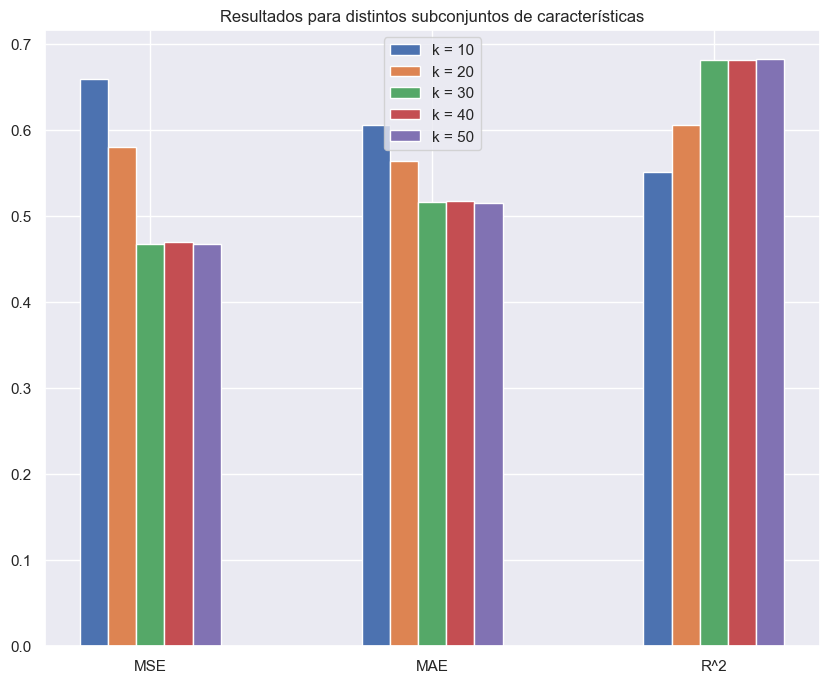

In [30]:
tablaComparacion(PearsonR_all, categorias, titulos, 'k = Nº características')

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(PearsonR_all, titulos, categorias, 'Resultados para distintos subconjuntos de características')

En este caso los mejores resultados se obtienen con 50 características, pero como son muy similares a con 30 características selecciono 30, reduciendo así bastante más la dimensionalidad.

In [31]:
PearsonR_best = PearsonR[2]

### Resultados de F-Value

╒══════════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ k = Nº características   │   k = 10 │   k = 20 │   k = 30 │   k = 40 │   k = 50 │
╞══════════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ MSE                      │ 0.657701 │ 0.581362 │ 0.574848 │ 0.467762 │ 0.466609 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ MAE                      │ 0.604464 │ 0.563879 │ 0.561396 │ 0.516012 │ 0.514995 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ R^2                      │ 0.551962 │ 0.603952 │ 0.608363 │ 0.681426 │ 0.682176 │
╘══════════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


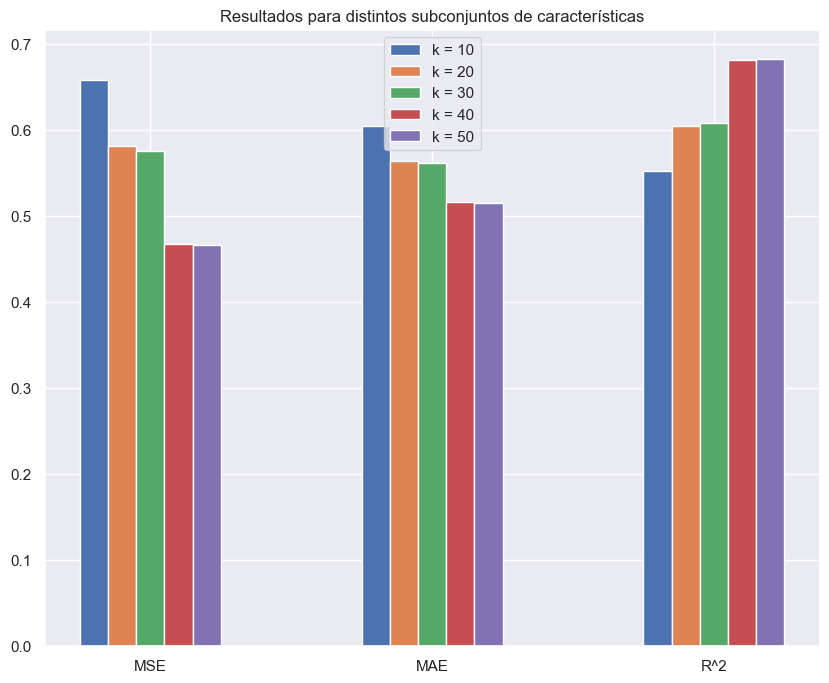

In [32]:
tablaComparacion(FValue_all, categorias, titulos, 'k = Nº características')

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(FValue_all, titulos, categorias, 'Resultados para distintos subconjuntos de características')

Para f-value de nuevo con 40 características basta, en este caso de hecho cuando se sigue aumentando el número de características los resultados se mantienen muy similares.

In [33]:
FValue_best = FValue[3]

### Recursive Feature Elimination (RFE)

Este algoritmo funciona eliminando recursivamente las características menos importantes y construyendo el modelo con las características restantes.

El proceso típico de RFE es el siguiente:

1. Selecciona un modelo de aprendizaje automático inicial (por ejemplo, regresión lineal, SVM, árboles de decisión).
2. Entrena el modelo con todas las características disponibles.
3. Evalúa la importancia de cada característica según el modelo.
4. Elimina la característica menos importante.
5. Repite los pasos 2-4 hasta alcanzar el número deseado de características o hasta que todas las características hayan sido eliminadas.

RFE es un enfoque iterativo y se repite hasta que se alcanza un número específico de características o hasta que se cumple algún otro criterio de parada predefinido.

In [34]:
from sklearn.feature_selection import RFE

# Creamos y guardamos en una lista los distintos modelos con distintas características a quedarse (k)
Rfe = []

for k in range(10, 51, 10): # Número de características a seleccionar
    Rfe.append(RFE(GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34), n_features_to_select=k)) 
    Rfe[-1].fit(x_train, y_train_log)

In [35]:
# Aplicamos CV a nuestros subconjuntos para obtener sus métricas de error
Rfe_results = []

for i in range(len(Rfe)):
    Rfe_results.append(crossValidation(GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34), kf, Rfe[i].transform(x_train), y_train_log, False))

Rfe_all = np.vstack((Rfe_results[0][1:], Rfe_results[1][1:], Rfe_results[2][1:], Rfe_results[3][1:], Rfe_results[4][1:]))

╒══════════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ k = Nº características   │   k = 10 │   k = 20 │   k = 30 │   k = 40 │   k = 50 │
╞══════════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ MSE                      │ 0.468506 │ 0.463729 │ 0.465629 │ 0.466279 │ 0.465748 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ MAE                      │ 0.516588 │ 0.512912 │ 0.514087 │ 0.514221 │ 0.513936 │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ R^2                      │ 0.680906 │ 0.68416  │ 0.682826 │ 0.68239  │ 0.682758 │
╘══════════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


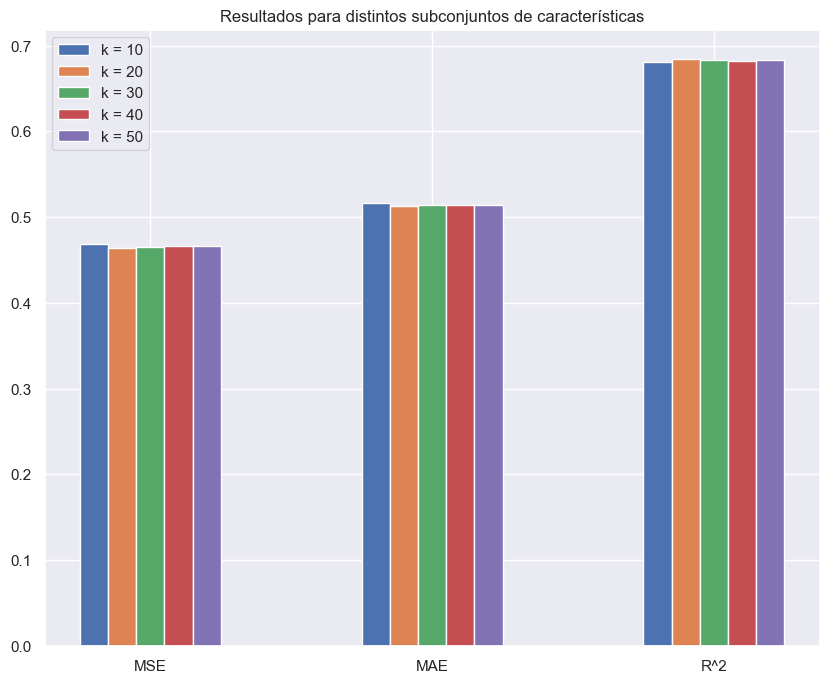

In [36]:
tablaComparacion(Rfe_all, categorias, titulos, 'k = Nº características')

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(Rfe_all, titulos, categorias, 'Resultados para distintos subconjuntos de características')

Usando RFE vemos que con 20 características obtenemos los mejores resultados.

In [53]:
Rfe_best = Rfe[1]
Rfe_best.support_

array([ True,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False])

### Las Vegas Feature Selection Method

Para poder comprobar si dos instancias son inconsistentes necesitamos discretizar las variables, por un lado necesitamos ver si dos instancias tienen las mismas características y por otro si sus salarios son distintos. Para la parte de los salarios decido que dos salarios son distintos si y solo si la diferencia entre ambos es mayor al 10% del menor salario, antes de aplicarlo a VFS quiero ver cuantos salarios son "iguales" siguiendo este criterio.

Para la parte de comprobar si dos instancias tienen las mismas características tenemos obviamente que comparar estas una a una, la pregunta es: ¿Cuándo dos características son iguales?, la respuesta es que depende, para variables categóricas y discretas con pocos valores estas características deben coincidir de forma exacta, pero para las variables continuas o discretas con muchos valores a tomar debemos de hacer algún tipo de clustering inicial para tener un grupo de opciones posibles más reducido y que permita que dos instancias coincidan en tener las mismas características.

Las características continuas y/o que recibirán un tratamiento especial son las siguientes:

* Partidos: Ya discretizada, rango: 1-38 (Vitinha 2022 es ruido, unión de dos Vitinha)
* Minutos: Continua, mismo tratamiento que al salario
* xG: Continua, redondeo a las unidades/parsear a integer
* xG sin penaltis: Continua, redondeo a las unidades/parsear a integer
* xAG: Continua, redondeo a las unidades/parsear a integer
* [Conducciones progresivas-Salvadas]: Continua, mismo tratamiento que al salario
* [Faltas cometidas-Entradas ganadas]: Continua, mismo tratamiento que al salario
* [Recuperaciones-Errores de control]: Continua, mismo tratamiento que al salario. Para Distancia tiros aparte redondeo a las unidades
* Valor equipo ini/fin: Discretizadas, el problema es que al haber 20 equipos por liga, 5 ligas y 6 temporadas distintas, tenemos 600 distintos valores posibles para estas variables, por lo que les daré el mismo tratamiento que al salario

In [39]:
# Truncamos estadísticas redondeando a las unidades
x_train_noNorm['xG'] = round(x_train_noNorm['xG'])
x_train_noNorm['xG sin penaltis'] = round(x_train_noNorm['xG sin penaltis'])
x_train_noNorm['xAG'] = round(x_train_noNorm['xAG'])
x_train_noNorm['Distancia tiros'] = round(x_train_noNorm['Distancia tiros'])

# Listamos los índices de las características ya discretizadas
idx_discret = [0,1,3,4,5,6,7,8,9,10,11,12,13,20,21,22,23,24,25,32,33,64,65,66,69,70,71,72]

pos_discret = np.zeros(73, dtype=bool)
pos_discret[idx_discret] = True

Por último hay que tener en cuenta también que hay que separar los salarios en grupos para calcular los ratios de inconsistencia, para ello usaré clustering por k-medias, probando varios valores de k.

Intervalos de bins:  [2.96000000e+02 2.90866667e+03 5.10100000e+03 7.05600000e+03
 9.18100000e+03 1.07690000e+04 1.23480000e+04 1.41120000e+04
 1.61095333e+04 1.76750000e+04 1.98450000e+04 2.20308000e+04
 2.44850000e+04 2.73176000e+04 3.07615333e+04 3.38120000e+04
 3.70225333e+04 4.14260000e+04 4.59310000e+04 5.05460000e+04
 5.68700000e+04 6.23800000e+04 6.92786667e+04 7.75795333e+04
 8.90380000e+04 1.02047000e+05 1.17949000e+05 1.39505800e+05
 1.80520000e+05 2.52476000e+05 1.60960900e+06]


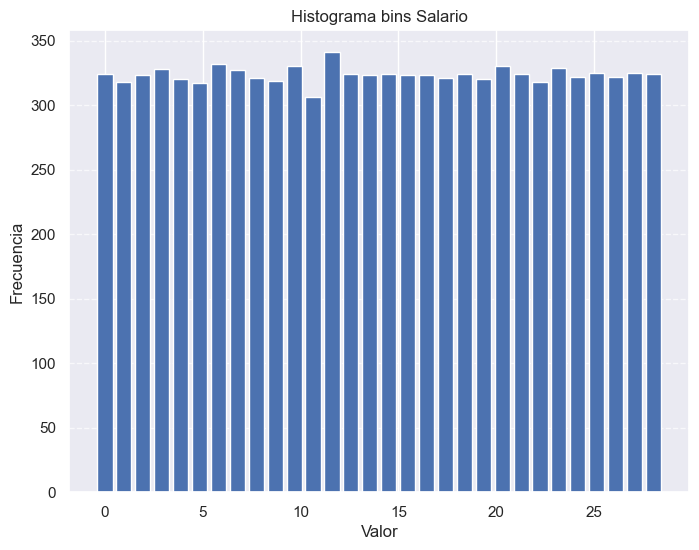

In [40]:
from sklearn.preprocessing import KBinsDiscretizer

bins = 30

discretizer = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile')
labels = discretizer.fit_transform(y_train.to_numpy().reshape(-1, 1))

# Obtener los límites de los bins
bin_edges = discretizer.bin_edges_[0]

print('Intervalos de bins: ', bin_edges)

plt.figure(figsize=(8, 6))
plt.hist(labels, bins=bins, align='left', rwidth=0.8)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma bins Salario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Seleccionamos 30 bins para intentar mantener en mismos grupos salarios que solo se lleven entre ellos un 10% de diferencia y no más.

##### Distribución de las características que entrañan duda

In [41]:
import seaborn as sns

def histogramaDiscreto(valores, titulo, nulos=False):
    if nulos: valores = [valor for valor in valores if valor != 0]
    
    plt.figure(figsize=(8, 6))
    plt.hist(valores, bins=max(valores)-min(valores)+1, align='left', rwidth=0.8)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.title(titulo)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def histogramaContinuo(data, titulo):
    sns.kdeplot(data, color='skyblue')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title(titulo)
    plt.show()

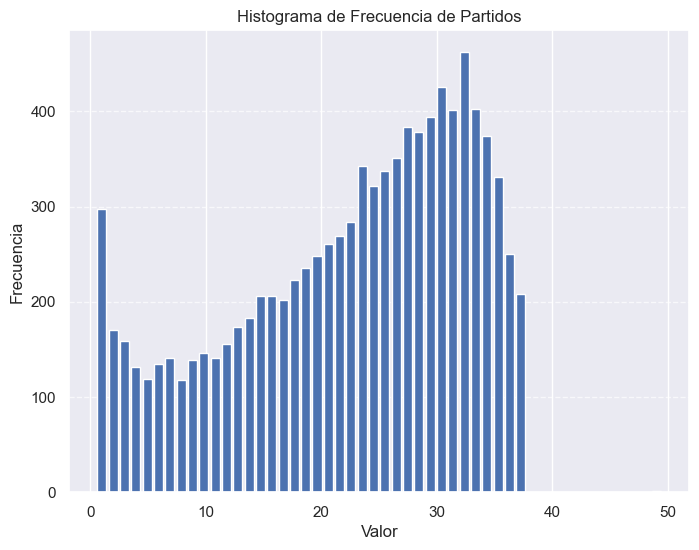

In [42]:
histogramaDiscreto(x_train_noNorm['Partidos'].astype(int), 'Histograma de Frecuencia de Partidos')

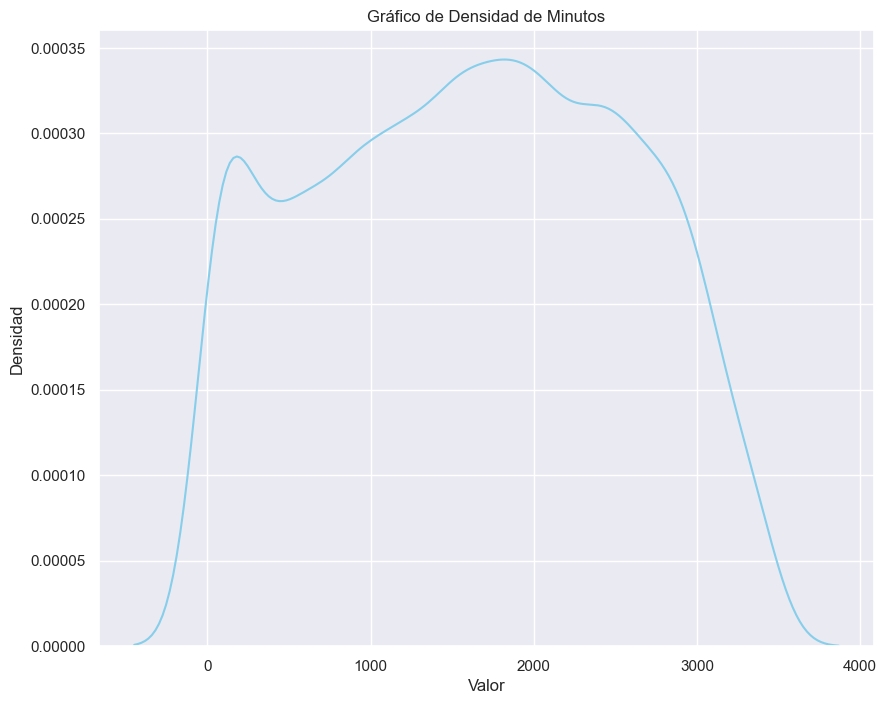

In [43]:
histogramaContinuo(x_train_noNorm['Minutos'].astype(int), 'Gráfico de Densidad de Minutos')

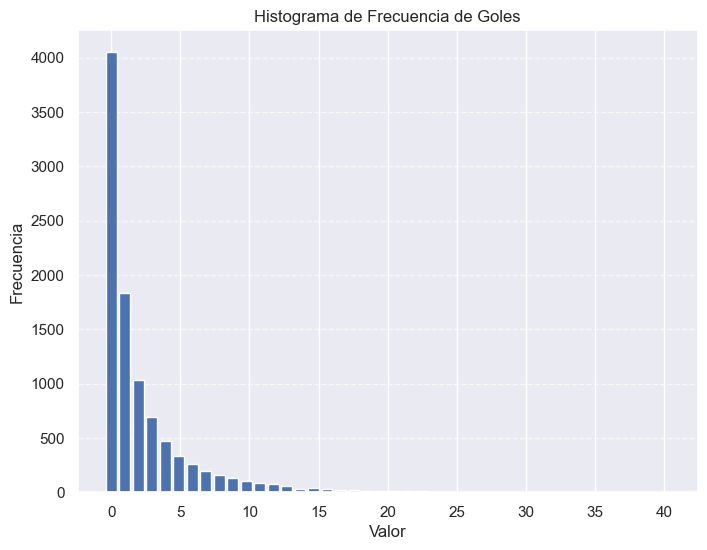

In [44]:
histogramaDiscreto(x_train_noNorm['Goles'].astype(int), 'Histograma de Frecuencia de Goles')

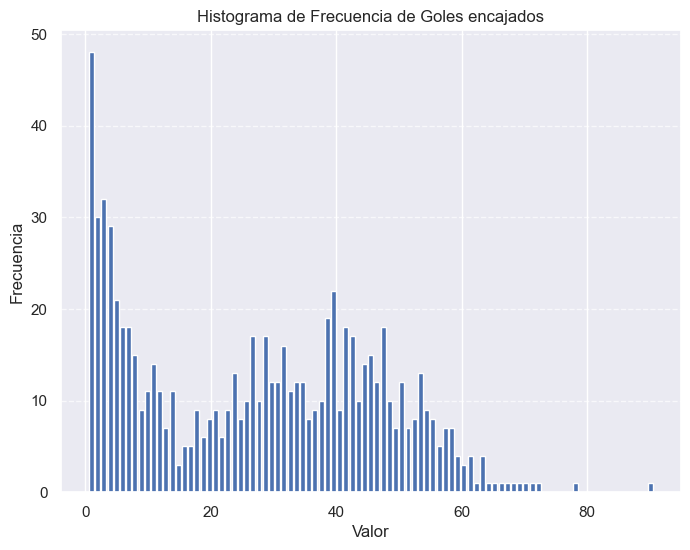

In [45]:
histogramaDiscreto(x_train_noNorm['Goles encajados'].astype(int), 'Histograma de Frecuencia de Goles encajados', True)

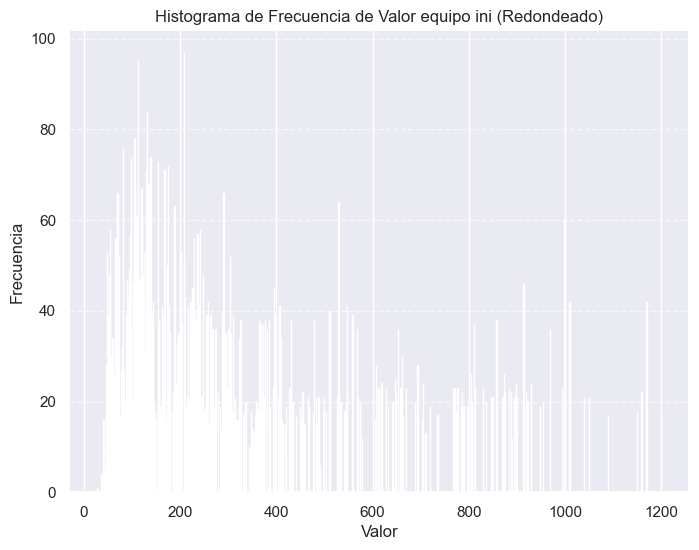

In [46]:
histogramaDiscreto(round(x_train_noNorm['Valor equipo ini']).astype(int), 'Histograma de Frecuencia de Valor equipo ini (Redondeado)')

##### Aplicación de LVF

In [47]:
def comparaContinuas(a, b, umbral=0.1):
    if a < b: 
        mayor = b
        menor = a
    else:
        mayor = a
        menor = b

    return (mayor-menor) <= menor*umbral

def comparaInstancias(a, b, features, pos_discret=pos_discret):
    iguales = True

    # Comparamos las características seleccionables
    for i in range(len(features)):
        if features[i]:
            if pos_discret[i]: # Ya discretizada, se comprueba que sean iguales
                iguales = a[i] == b[i]
            else: # Continua, se compara con la función
                iguales = comparaContinuas(a[i], b[i])
        
        if not iguales: break # Ya sabemos que no hay inconsistencia

    return iguales

def instMayoritaria(instancias, discretizer):
    instancias = discretizer.transform(instancias.reshape(-1, 1))

    # Encontrar los valores únicos y sus conteos
    valores_unicos, conteos = np.unique(instancias, return_counts=True)

    # Encontrar el valor más repetido y su conteo
    indice_max_repetido = np.argmax(conteos)
    return conteos[indice_max_repetido]

def InconCheck(data, features, discretizer):
    inconsistency_rate = 0
    
    for i in range(len(data)):
        inconsistentes = []
        
        # Compara i1 con el resto de instancias en busca de inconsistencias
        for j in range(i+1, len(data)):
            if comparaInstancias(data[i], data[j], features) and not comparaContinuas(data[i][-1], data[j][-1]): # Inconsistentes
                inconsistentes.append(data[j][-1]) # Guardamos los salarios de los inconsistentes
            
        # Calculamos contador de inconsistencias
        if len(inconsistentes) > 0:
            inconsistency_rate += len(inconsistentes) - instMayoritaria(np.array(inconsistentes), discretizer)
    
    return inconsistency_rate/data.shape[0]

In [48]:
# Pruebas de las funciones

# instMayoritaria()
salarios = np.array([3000, 4000, 5000, 4000, 300, 70000, 105000])

conteos = instMayoritaria(salarios, discretizer)

print('Clase mayoritaria: ', conteos)

# comparaContinuas()
iguales = 0
distintos = 0
salario = 3900

for i in salarios:
    aux = comparaContinuas(salario, i)

    if aux: iguales+=1
    else: distintos+=1

print(f'Salarios iguales: {iguales}')
print(f'Salarios distintos: {distintos}')

# comparaInstancias()
a = np.array([1, 1, 2.5, 4])
b = np.array([1, 1, 2.4, 5])
f = np.array([1,1,1,0])

if comparaInstancias(a, b, f): print('Instancias iguales')
else: print('Fallo')

Clase mayoritaria:  4
Salarios iguales: 2
Salarios distintos: 5
Instancias iguales


In [49]:
def LVF(MAX_TRIES, dataset, n_features, discretizer, seed=42):
    # Establecer la semilla
    np.random.seed(seed)
    
    C_act = n_features
    S_act = np.ones(n_features).astype(int)
    i_act = InconCheck(dataset, S_act, discretizer)
    print(i_act)
    L = [S_act]

    for a in range(MAX_TRIES):
        S = np.random.choice([0, 1], size=n_features)
        C = np.count_nonzero(S)

        if(C < C_act):
            i = InconCheck(dataset, S, discretizer)
            print(i)

            if(i <= i_act):
                S_act = S
                C_act = C
                i_act = i
                L = [S_act]

        elif(C == C_act):
            if(all(np.any(S != S2) for S2 in L)): L.append(S)
    
    return L

In [50]:
dataset = pd.concat([x_train_noNorm, y_train], axis=1)

L = LVF(77*x_train.shape[1], dataset.to_numpy(), x_train.shape[1], discretizer)
L

0.0
0.0
0.000721129082105697
0.0
0.0006181106418048831
0.0
0.0
0.0
0.0
0.00020603688060162769


[array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 1])]

In [51]:
x_filter1 = x_train[x_train.columns[L[0]==1]]
x_filter2 = x_train[x_train.columns[L[1]==1]]
x_filter3 = x_train[x_train.columns[L[2]==1]]

╒═════════════════════╤═════════════╤═════════════╤═════════════╕
│ Métricas de error   │   Dataset 1 │   Dataset 2 │   Dataset 3 │
╞═════════════════════╪═════════════╪═════════════╪═════════════╡
│ MSE                 │    0.840005 │    0.700876 │    0.64509  │
├─────────────────────┼─────────────┼─────────────┼─────────────┤
│ MAE                 │    0.704783 │    0.63253  │    0.597774 │
├─────────────────────┼─────────────┼─────────────┼─────────────┤
│ R^2                 │    0.427631 │    0.522274 │    0.560704 │
├─────────────────────┼─────────────┼─────────────┼─────────────┤
│ MSE-TR              │    0.793285 │    0.660236 │    0.606323 │
├─────────────────────┼─────────────┼─────────────┼─────────────┤
│ MAE-TR              │    0.682935 │    0.613821 │    0.57725  │
├─────────────────────┼─────────────┼─────────────┼─────────────┤
│ R^2-TR              │    0.45969  │    0.550291 │    0.587044 │
╘═════════════════════╧═════════════╧═════════════╧═════════════╛


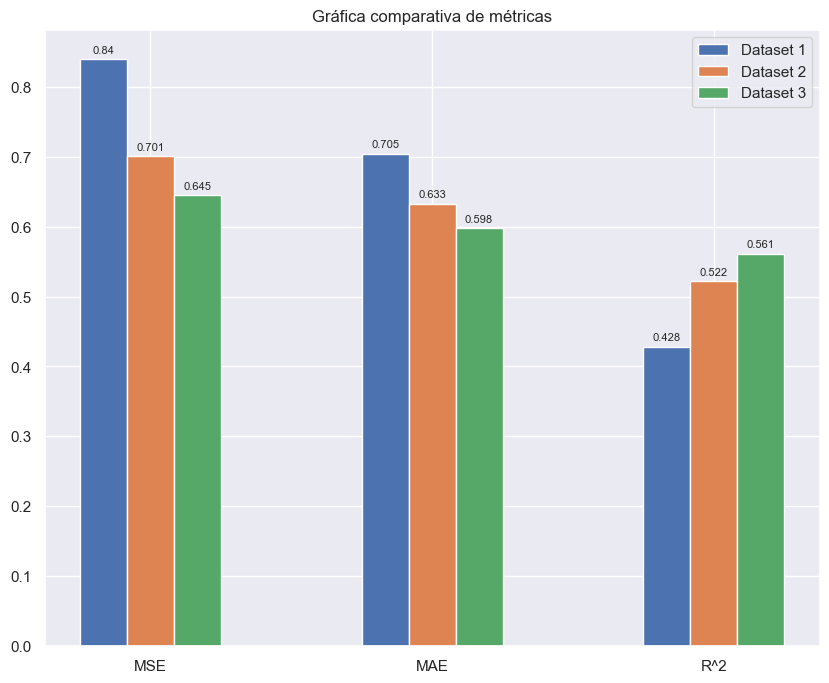

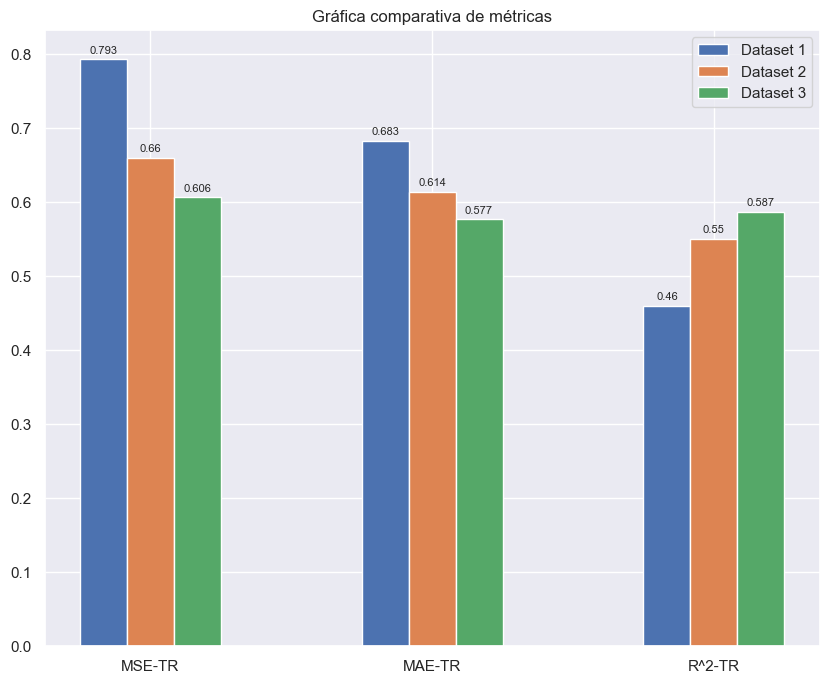

In [52]:
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_filter1.to_numpy(), y_train_log, True)
result2 = crossValidation(model_2, kf, x_filter2.to_numpy(), y_train_log, True)
result3 = crossValidation(model_3, kf, x_filter3.to_numpy(), y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['Dataset 1', 'Dataset 2', 'Dataset 3']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

### Las Vegas Feature Selector, Wrapper version

In [53]:
def entrenaSubset(x, y, features):
    x_filter = x[x.columns[features==1]]

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.15, random_state=42)

    # Entrenar el modelo Gradient Boosting
    model = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular R^2
    r2 = r2_score(y_test, y_pred)

    return r2

def LVW(MAX_TRIES, x, y, n_features, seed=42):
    # Establecer la semilla
    np.random.seed(seed)
    
    C_act = n_features
    S_act = np.ones(n_features).astype(int)
    i_act = entrenaSubset(x, y, S_act)
    L = [S_act]

    cont = 0
    for a in range(MAX_TRIES):
        S = np.random.choice([0, 1], size=n_features)
        C = np.count_nonzero(S)
        cont+=1
        if cont%250==0: print(cont)

        if(C < C_act):
            i = entrenaSubset(x, y, S)

            if(i >= i_act):
                S_act = S
                C_act = C
                i_act = i
                L = [S_act]

        elif(C == C_act):
            if(all(np.any(S != S2) for S2 in L)): L.append(S)
    
    return L

In [54]:
L = LVW(77*x_train.shape[1], x_train, y_train_log, x_train.shape[1])
L

250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500


[array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0])]

In [40]:
# Mejor solución
lvw_sol = np.array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
					0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
					0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
					0, 1, 1, 0, 1, 1, 0])

LVW_data = (x_train[x_train.columns[lvw_sol==1]]).to_numpy()

In [55]:
x_filter1 = x_train[x_train.columns[L[0]==1]]
x_filter2 = x_train[x_train.columns[L[1]==1]]
x_filter3 = x_train[x_train.columns[L[2]==1]]

╒═════════════════════╤═════════════╤═════════════╤═════════════╕
│ Métricas de error   │   Dataset 1 │   Dataset 2 │   Dataset 3 │
╞═════════════════════╪═════════════╪═════════════╪═════════════╡
│ MSE                 │    0.472207 │    0.598426 │    0.576855 │
├─────────────────────┼─────────────┼─────────────┼─────────────┤
│ MAE                 │    0.51684  │    0.593569 │    0.562002 │
├─────────────────────┼─────────────┼─────────────┼─────────────┤
│ R^2                 │    0.678355 │    0.592249 │    0.607025 │
├─────────────────────┼─────────────┼─────────────┼─────────────┤
│ MSE-TR              │    0.435149 │    0.560197 │    0.538708 │
├─────────────────────┼─────────────┼─────────────┼─────────────┤
│ MAE-TR              │    0.495721 │    0.573485 │    0.541314 │
├─────────────────────┼─────────────┼─────────────┼─────────────┤
│ R^2-TR              │    0.70362  │    0.618441 │    0.63309  │
╘═════════════════════╧═════════════╧═════════════╧═════════════╛


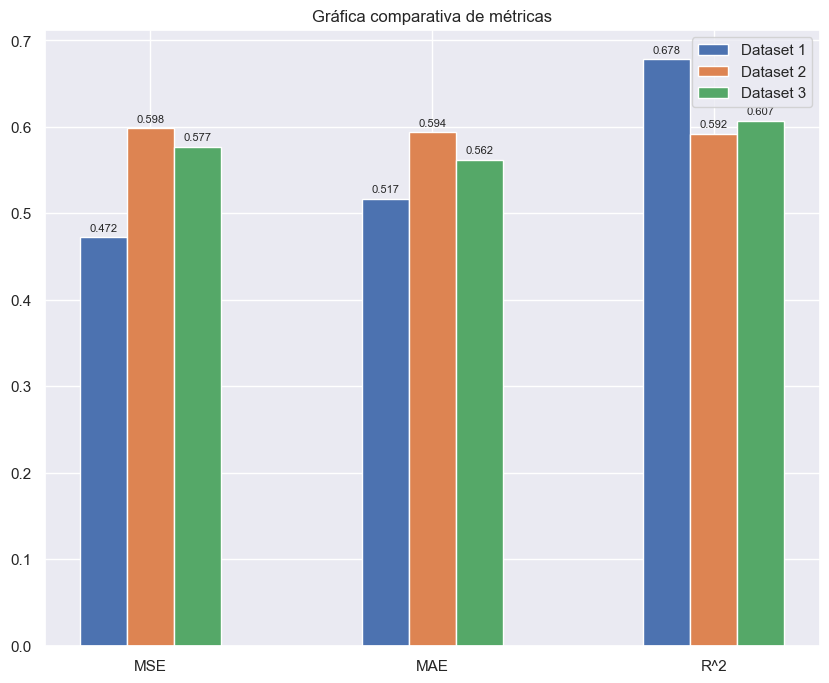

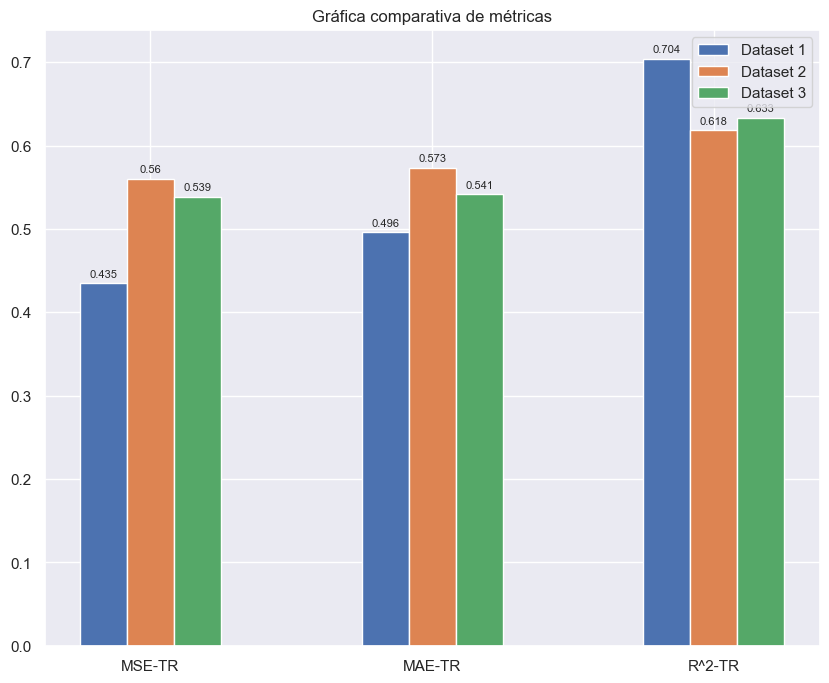

In [56]:
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_filter1.to_numpy(), y_train_log, True)
result2 = crossValidation(model_2, kf, x_filter2.to_numpy(), y_train_log, True)
result3 = crossValidation(model_3, kf, x_filter3.to_numpy(), y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['Dataset 1', 'Dataset 2', 'Dataset 3']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

### Comparativa de los mejores parámetros para el modelo de cada dataset

In [47]:
Mifs_data = Mifs_best.transform(x_train)
PearsonR_data = PearsonR_best.transform(x_train)
FValue_data = FValue_best.transform(x_train)
Rfe_data = Rfe_best.transform(x_train)

╒═════════════════════╤══════════╤═══════════════╤═══════════╤══════════╤══════════╕
│ Métricas de error   │     MIFS │   Pearson's R │   F value │      RFE │      LVW │
╞═════════════════════╪══════════╪═══════════════╪═══════════╪══════════╪══════════╡
│ MSE                 │ 0.468347 │      0.467594 │  0.467762 │ 0.463729 │ 0.472207 │
├─────────────────────┼──────────┼───────────────┼───────────┼──────────┼──────────┤
│ MAE                 │ 0.516434 │      0.515889 │  0.516012 │ 0.512912 │ 0.51684  │
├─────────────────────┼──────────┼───────────────┼───────────┼──────────┼──────────┤
│ R^2                 │ 0.68102  │      0.681525 │  0.681426 │ 0.68416  │ 0.678355 │
├─────────────────────┼──────────┼───────────────┼───────────┼──────────┼──────────┤
│ MSE-TR              │ 0.434    │      0.431993 │  0.430688 │ 0.428623 │ 0.435149 │
├─────────────────────┼──────────┼───────────────┼───────────┼──────────┼──────────┤
│ MAE-TR              │ 0.496203 │      0.495329 │  0.494627 │ 0.

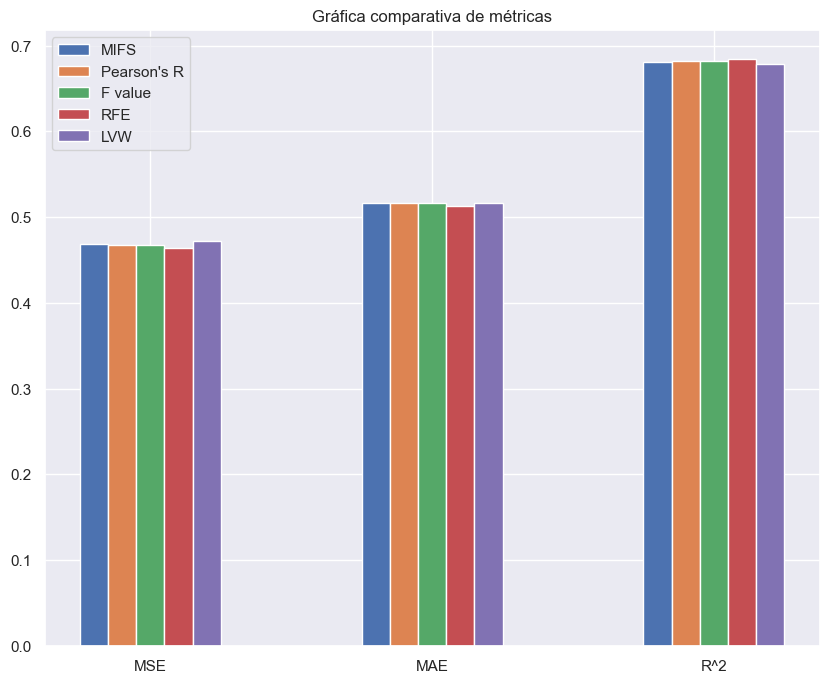

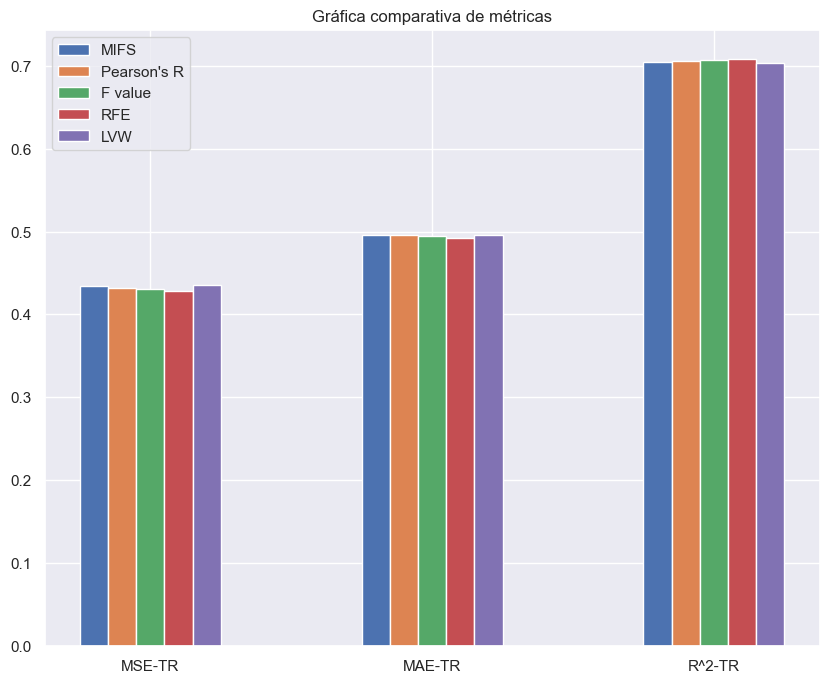

In [48]:
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_5 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, Mifs_data, y_train_log, True)
result2 = crossValidation(model_2, kf, PearsonR_data, y_train_log, True)
result3 = crossValidation(model_3, kf, FValue_data, y_train_log, True)
result4 = crossValidation(model_4, kf, Rfe_data, y_train_log, True)
result5 = crossValidation(model_5, kf, LVW_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:], result5[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['MIFS', "Pearson's R", 'F value', 'RFE', 'LVW']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Elegimos entonces el dataset de RFE, ya que obteniendo todos resultados muy similares, REF cuenta con una menor dimensionalidad, así como con un menor overfitting. Ahora probaré que tal funciona el dataset con los modelos más prometedores.

In [55]:
best_data = Rfe_data

# Entrenamos el mejor dataset con otros modelos

### Gradient Boosting

**n_estimators**

Por lo general a mayor número mejores resultados, aunque hay que encontrar el equilibrio entre mejora y tiempo de cómputo invertido.

╒═════════════════════╤═════════════════════╤═════════════════════╤══════════════════════╤══════════════════════╕
│ Métricas de error   │   n_estimators = 20 │   n_estimators = 50 │   n_estimators = 100 │   n_estimators = 200 │
╞═════════════════════╪═════════════════════╪═════════════════════╪══════════════════════╪══════════════════════╡
│ MSE                 │            0.559842 │            0.463729 │             0.438917 │             0.425961 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ MAE                 │            0.564366 │            0.512912 │             0.498737 │             0.49128  │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ R^2                 │            0.618668 │            0.68416  │             0.701056 │             0.709876 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────

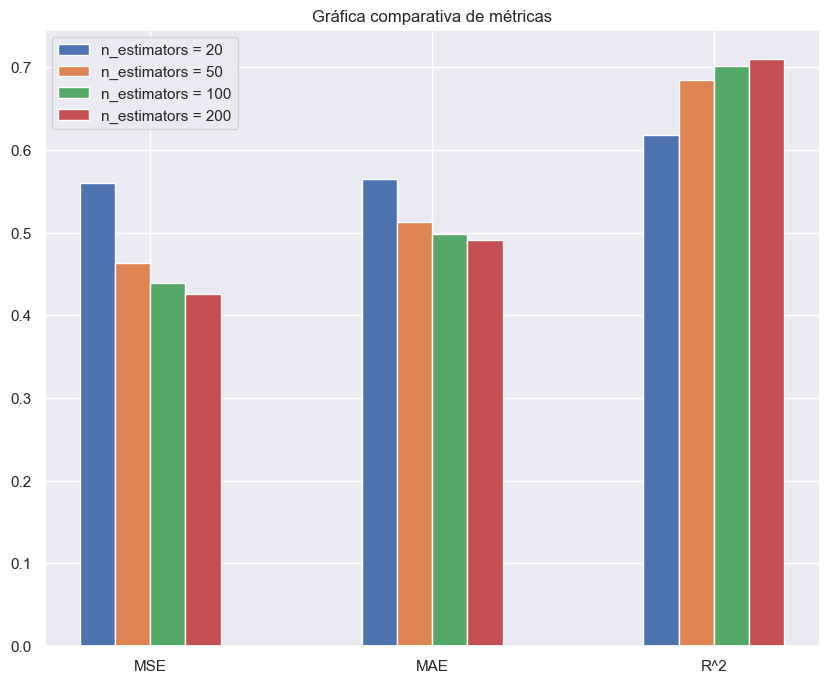

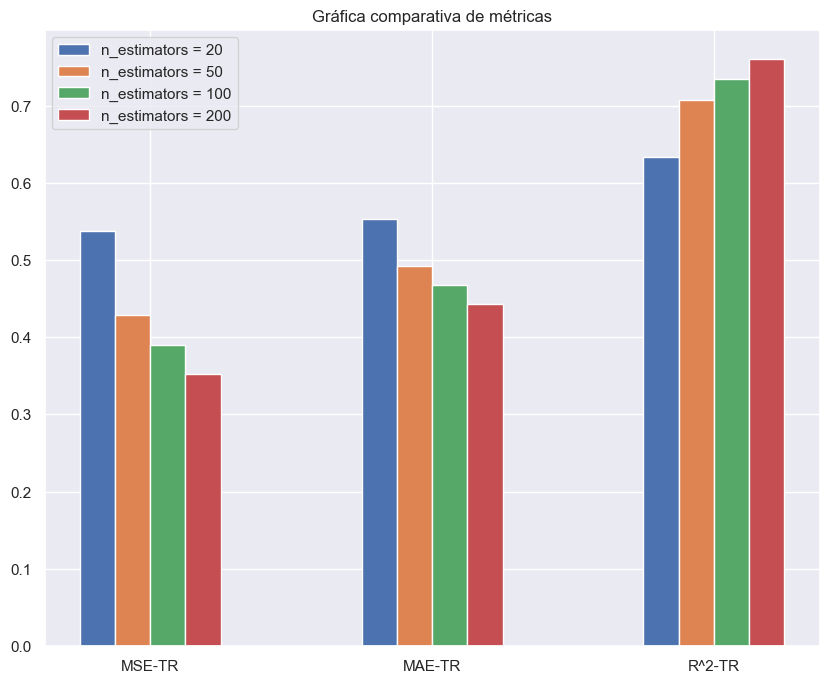

In [54]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 20, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 200, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)
result4 = crossValidation(model_4, kf, best_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['n_estimators = 20', 'n_estimators = 50', 'n_estimators = 100', 'n_estimators = 200']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

De momento 100 árboles está bien, el tiempo de cómputo es competente y los resultados buenos, no aumentamos más debido a que ya no hay tanta mejora en validación, si conseguimos mejorar la generalización del modelo más adelante puede que aumente el número de árboles.

**learning_rate**

Un valor más bajo de tasa de aprendizaje reduce el impacto de cada árbol, lo que puede ayudar a prevenir el sobreajuste y a mejorar la generalización.

Probamos un conjunto de valores alrededor de 0.1 que es el valor predeterminado.

╒═════════════════════╤════════════════════════╤════════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╕
│ Métricas de error   │   learning_rate = 0.04 │   learning_rate = 0.08 │   learning_rate = 0.1 │   learning_rate = 0.4 │   learning_rate = 0.8 │
╞═════════════════════╪════════════════════════╪════════════════════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╡
│ MSE                 │               0.477687 │               0.444558 │              0.438917 │              0.44213  │              0.497336 │
├─────────────────────┼────────────────────────┼────────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┤
│ MAE                 │               0.520565 │               0.502119 │              0.498737 │              0.500037 │              0.527795 │
├─────────────────────┼────────────────────────┼────────────────────────┼───────────────────────┼───────────────────────┼───

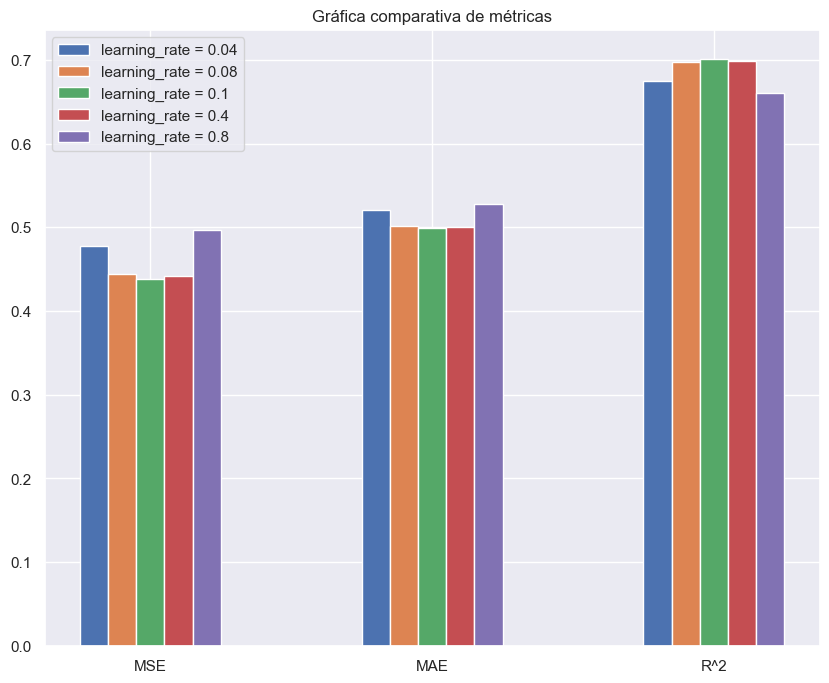

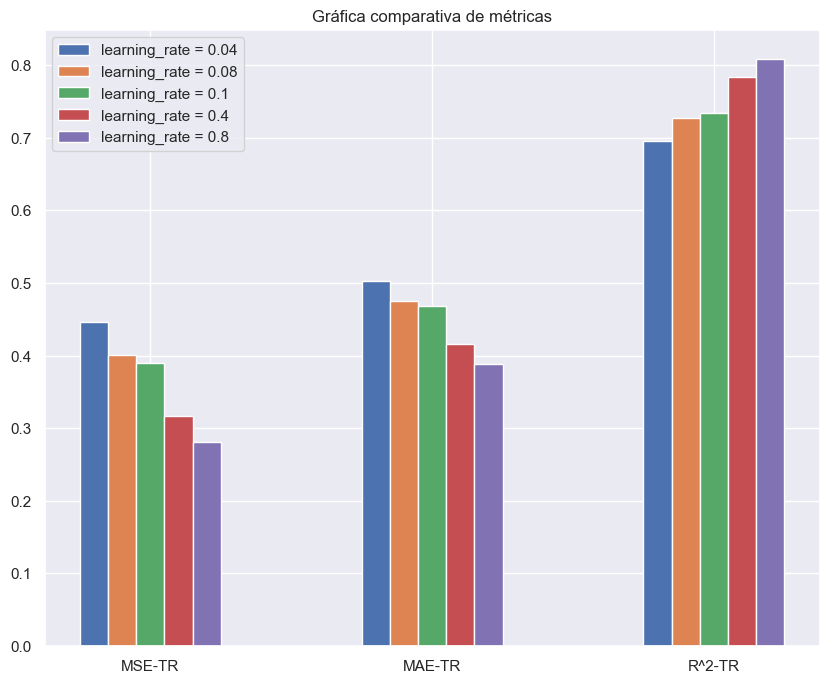

In [56]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.04, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.08, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.4, random_state=34)
model_5 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.8, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)
result4 = crossValidation(model_4, kf, best_data, y_train_log, True)
result5 = crossValidation(model_5, kf, best_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:], result5[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['learning_rate = 0.04', 'learning_rate = 0.08', 'learning_rate = 0.1', 'learning_rate = 0.4', 'learning_rate = 0.8']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Un learning_rate de 0.1 es el que mejores resultados ofrece, por lo que mantengo dicho valor.

**subsample**

Un valor menor de subsample significa una reducción de la varianza y aumento del sesgo en el proceso de entrenamiento, ya que cada árbol se entrena en un subconjunto aleatorio de las muestras. Esto puede ayudar a reducir el riesgo de sobreajuste.

Probaré con distintos porcentajes de subsample.

╒═════════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│ Métricas de error   │   subsample=1.0 │   subsample=0.8 │   subsample=0.6 │   subsample=0.4 │
╞═════════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ MSE                 │        0.438917 │        0.438804 │        0.4412   │        0.441165 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ MAE                 │        0.498737 │        0.498521 │        0.499885 │        0.500436 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ R^2                 │        0.701056 │        0.701127 │        0.699522 │        0.699491 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ MSE-TR              │        0.389412 │        0.391047 │        0.393515 │        0.396517 │
├─────────────────────┼─────────────────

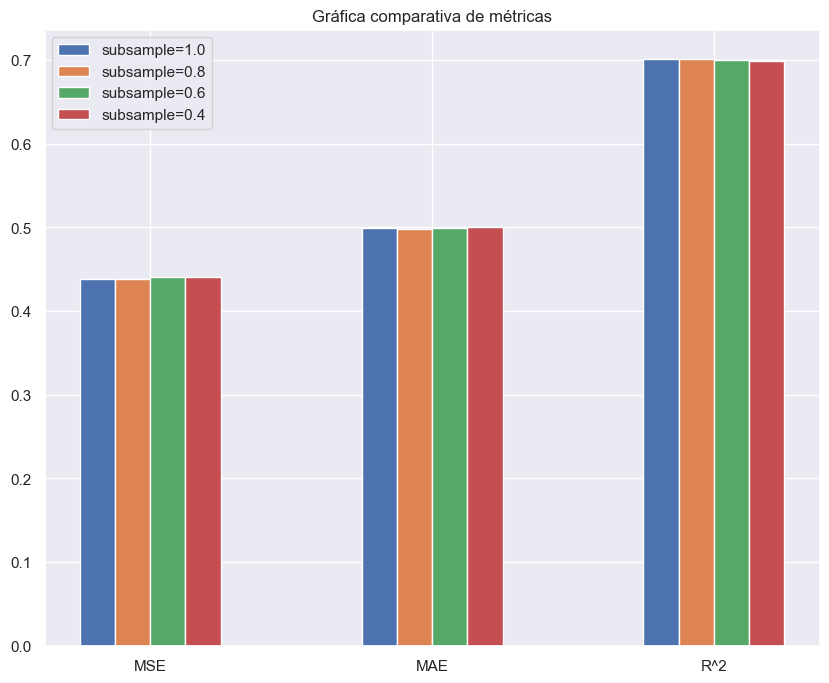

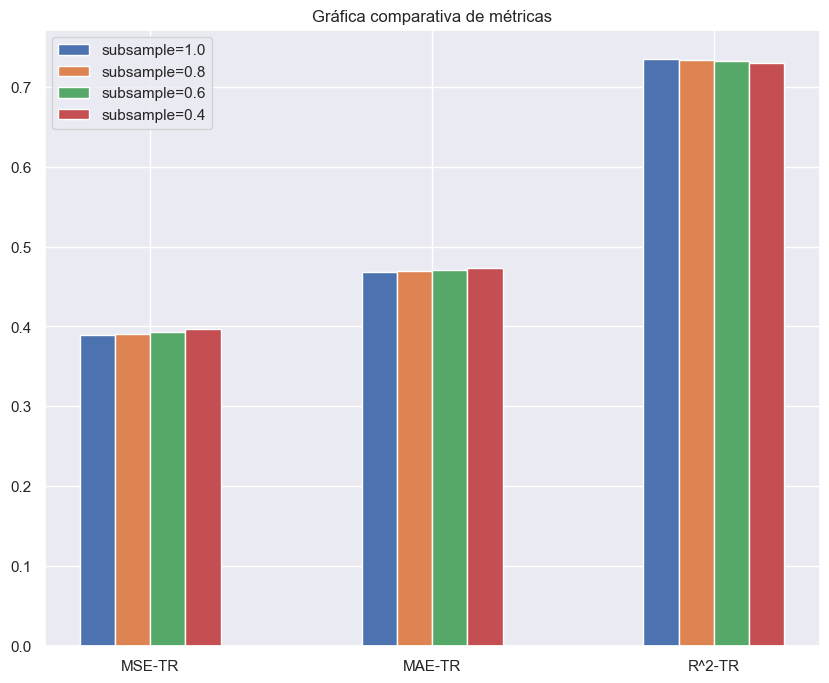

In [57]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=1.0, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.4, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)
result4 = crossValidation(model_4, kf, best_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['subsample=1.0', 'subsample=0.8', 'subsample=0.6', 'subsample=0.4']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Con todas las opciones los resultados son muy similares, elijo un subconjunto del 80%, ya que así los tiempos de cómputo serán menores y tampoco nos quedamos con pocos datos como sería el caso de seleccionar el 60%.

**max_depth**

A mayor profundidad creamos árboles más complejos, pero puede existir sobreajuste si no se controla. Probaré varios valores teniendo en cuenta que hasta ahora el valor por defecto ha sido 3.

╒═════════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Métricas de error   │   max_depth=2 │   max_depth=3 │   max_depth=4 │   max_depth=6 │
╞═════════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ MSE                 │      0.460172 │      0.438804 │      0.428992 │      0.42052  │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MAE                 │      0.511646 │      0.498521 │      0.492195 │      0.486899 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ R^2                 │      0.686584 │      0.701127 │      0.707762 │      0.713497 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MSE-TR              │      0.435501 │      0.391047 │      0.343771 │      0.227803 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MAE-TR              │      0.4

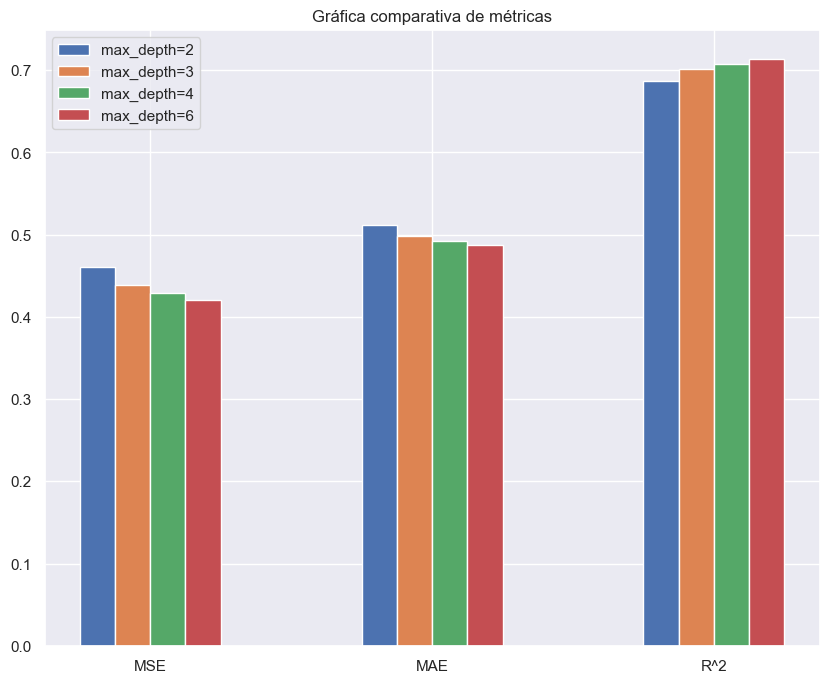

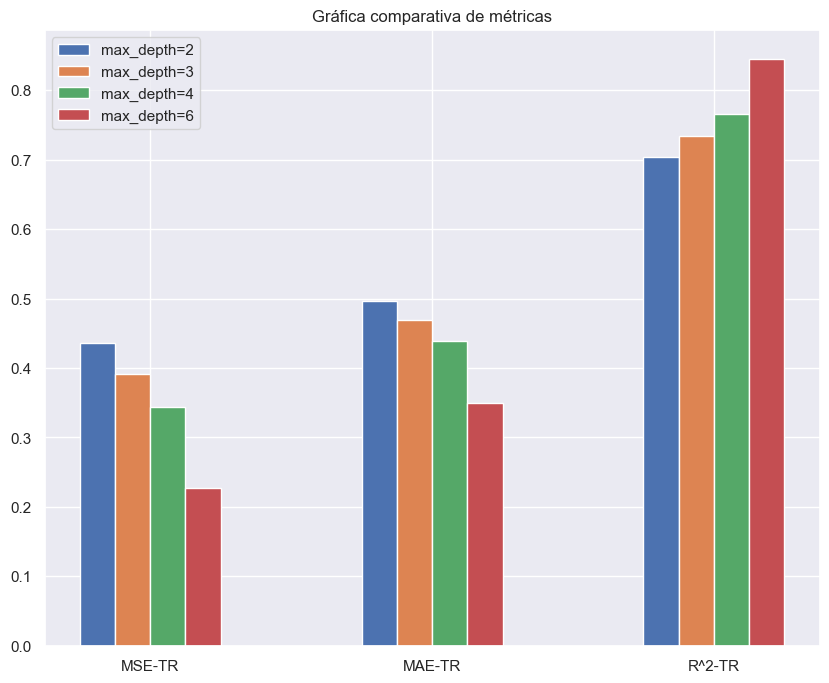

In [58]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=2, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=3, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=4, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=6, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)
result4 = crossValidation(model_4, kf, best_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_depth=2', 'max_depth=3', 'max_depth=4', 'max_depth=6']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Una profundidad de 6 es la que mejores resultados da. Vamos a comprobar si aumentando aún más la profundidad máxima, conseguimos mejorar los resultados.

╒═════════════════════╤═══════════════╤═══════════════╤════════════════╤════════════════╕
│ Métricas de error   │   max_depth=6 │   max_depth=8 │   max_depth=10 │   max_depth=12 │
╞═════════════════════╪═══════════════╪═══════════════╪════════════════╪════════════════╡
│ MSE                 │      0.42052  │      0.428943 │      0.444137  │     0.451557   │
├─────────────────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│ MAE                 │      0.486899 │      0.491356 │      0.50051   │     0.505902   │
├─────────────────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│ R^2                 │      0.713497 │      0.707788 │      0.697397  │     0.692353   │
├─────────────────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│ MSE-TR              │      0.227803 │      0.104413 │      0.0317194 │     0.00690553 │
├─────────────────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│ MAE-TR  

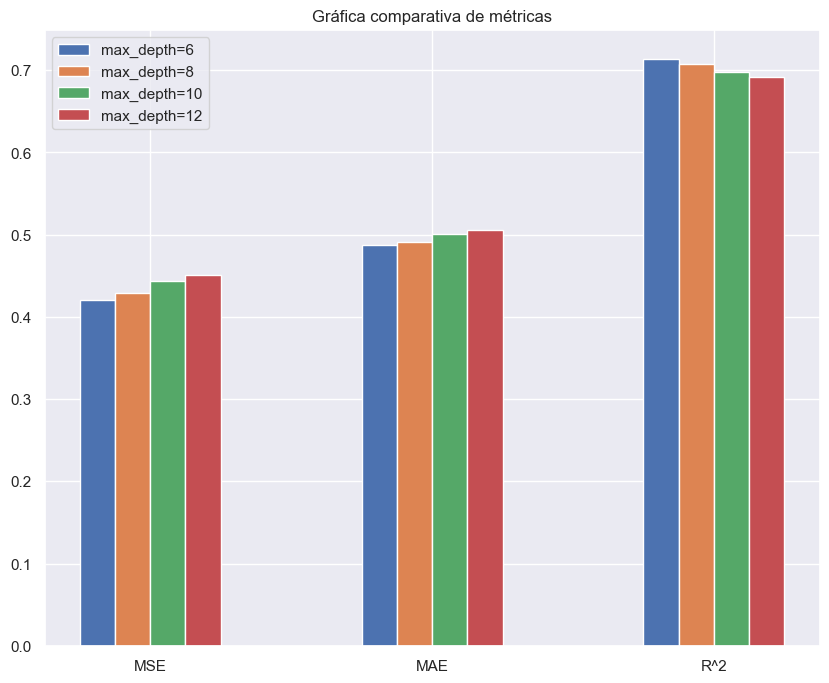

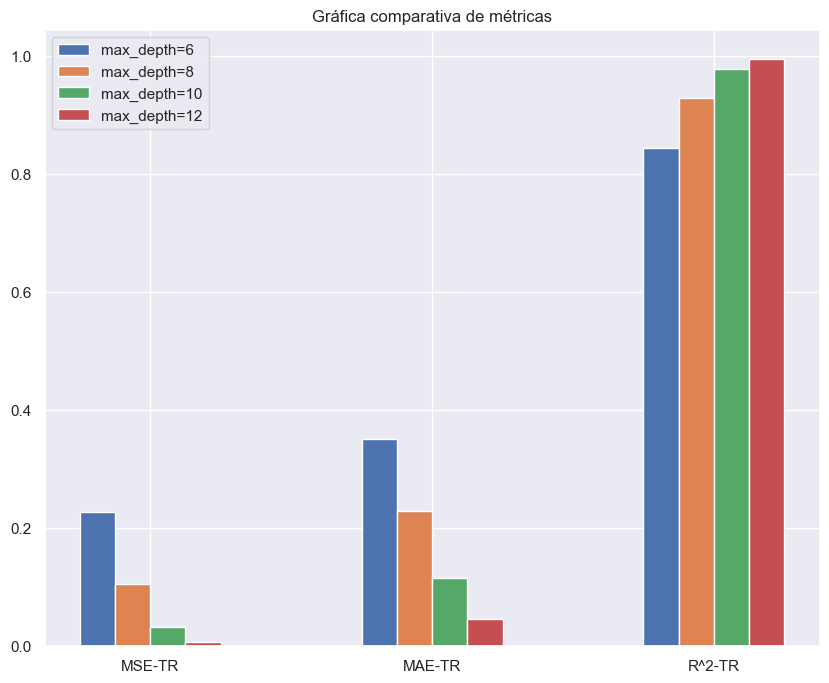

In [60]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=6, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=8, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=10, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=12, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)
result4 = crossValidation(model_4, kf, best_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_depth=6', 'max_depth=8', 'max_depth=10', 'max_depth=12']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

**max_features**

Al reducir el máximo de características hacemos que se reduzca la variabilidad y aumente el sesgo, aunque con otros parámetros que ya hemos modificado esto no ha ayudado probaré varios valores para ver si sirve de algo.

╒═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ Métricas de error   │   max_features=None │   max_features=sqrt │   max_features=log2 │
╞═════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ MSE                 │            0.42052  │            0.431369 │            0.431369 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MAE                 │            0.486899 │            0.492308 │            0.492308 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ R^2                 │            0.713497 │            0.706216 │            0.706216 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MSE-TR              │            0.227803 │            0.258515 │            0.258515 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MAE-TR  

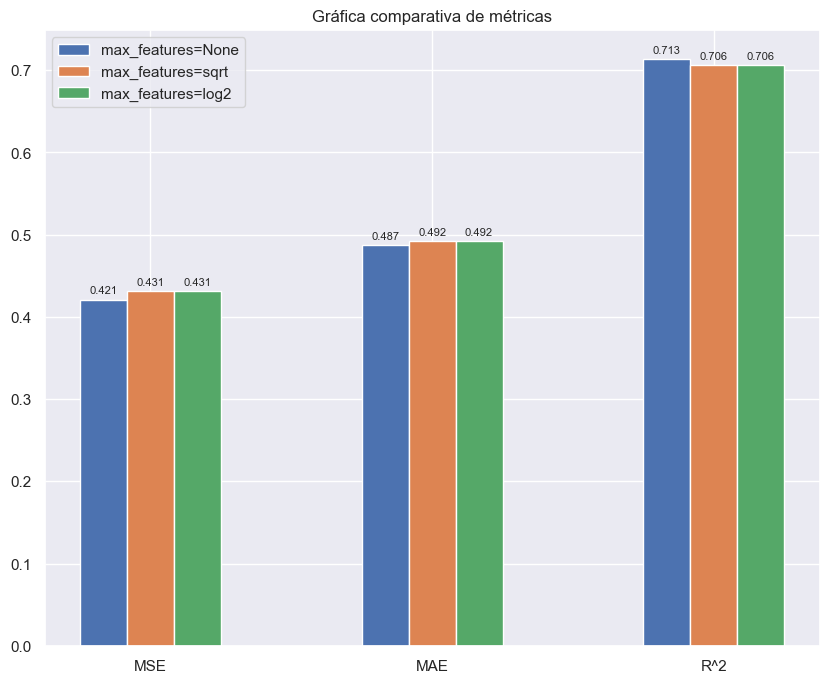

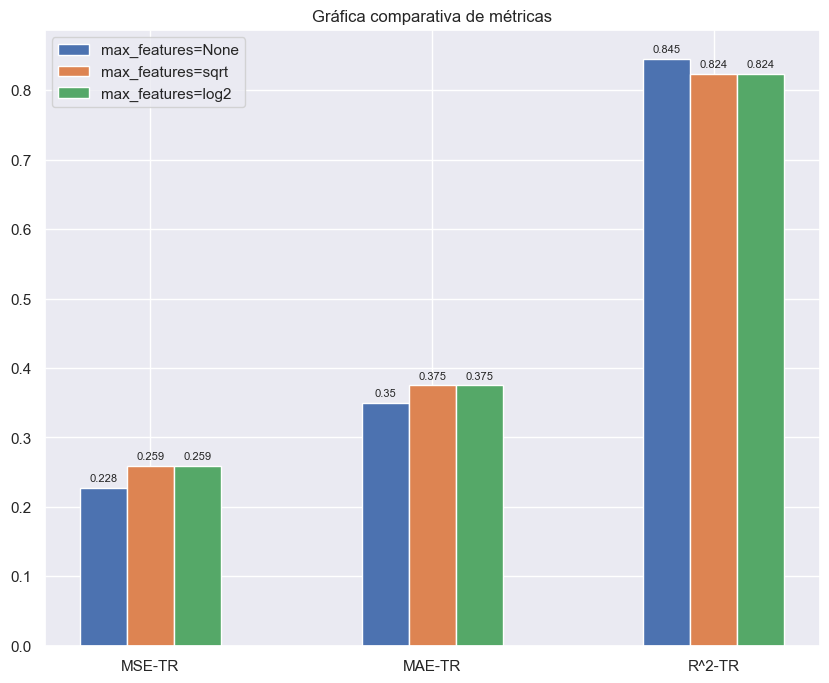

In [59]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=6, max_features=None, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=6, max_features='sqrt', random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, max_depth=6, max_features='log2', random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_features=None', 'max_features=sqrt', 'max_features=log2']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

De nuevo el intentar reducir la complejidad no sirve de nada, apesar de que reduciendo características se generaliza mejor, esto no es por una mejora en los resultados de validación, sino por una peora en los de train, dejo pues el parámetro que había por defecto.

### Perceptrón Multicapa (MLP)

**hidden_layer_sizes**

Agregar más neuronas o capas ocultas puede permitir que la red aprenda representaciones más complejas de los datos, pero también puede aumentar el riesgo de sobreajuste.

Buscaré información en internet acerca de cual es el número adecuado de capas a añadir.

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

Normalmente con una capa oculta suele bastar y en cuanto al número de nodos este suele ser la media entre la capa de entrada y la de salida, en este caso 15. Probaré esta estructura junto con otras estructuras modificadas de esta y compararé los resultados.

╒═════════════════════╤═══════════════════════════╤═══════════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│ Métricas de error   │   hidden_layer_sizes=(15) │   hidden_layer_sizes=(15, 15) │   hidden_layer_sizes=(30) │   hidden_layer_sizes=(30, 30) │
╞═════════════════════╪═══════════════════════════╪═══════════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ MSE                 │                  0.494939 │                      0.498286 │                  0.473792 │                      0.478689 │
├─────────────────────┼───────────────────────────┼───────────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ MAE                 │                  0.535816 │                      0.540757 │                  0.523574 │                      0.531653 │
├─────────────────────┼───────────────────────────┼───────────────────────────────┼───────────────────────────┼─────────────────────────

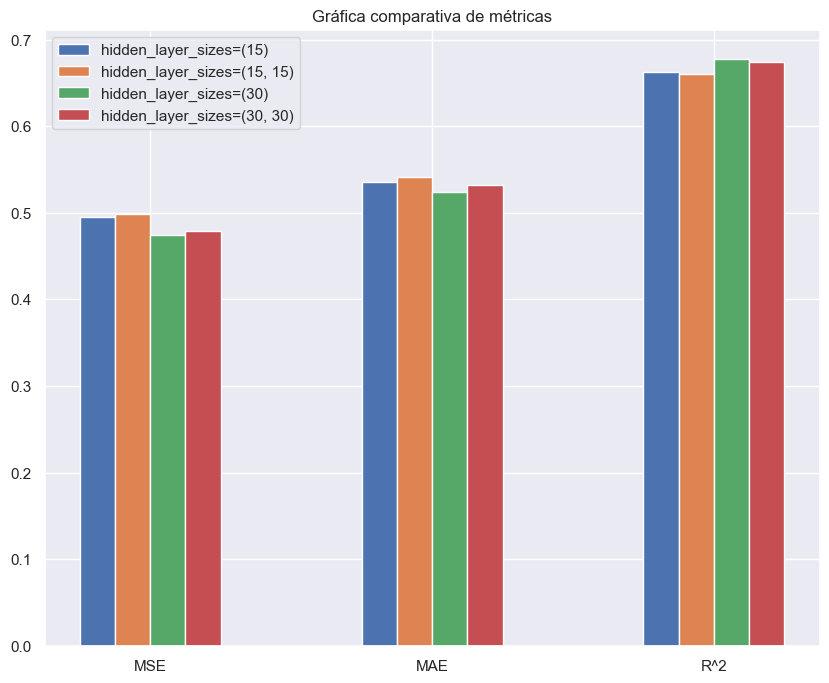

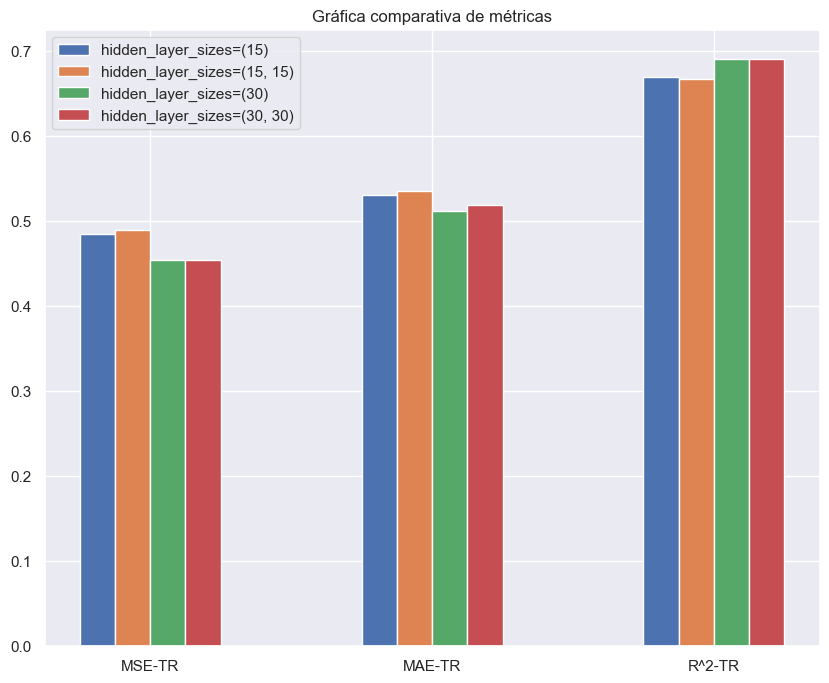

In [62]:
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(15), max_iter=500)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(15, 15), max_iter=500)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(30), max_iter=500)
model_4 = MLPRegressor(random_state=34, hidden_layer_sizes=(30, 30), max_iter=500)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)
result4 = crossValidation(model_4, kf, best_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['hidden_layer_sizes=(15)', 'hidden_layer_sizes=(15, 15)', 'hidden_layer_sizes=(30)', 'hidden_layer_sizes=(30, 30)']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Parece que con una sola capa el modelo da mejores resultados que con varias, por otro lado parece que a más neuronas mejores resultados también, por lo que quiero porbar con más de 30 neuronas.

╒═════════════════════╤═══════════════════════════╤═══════════════════════════╤═══════════════════════════╕
│ Métricas de error   │   hidden_layer_sizes=(30) │   hidden_layer_sizes=(40) │   hidden_layer_sizes=(50) │
╞═════════════════════╪═══════════════════════════╪═══════════════════════════╪═══════════════════════════╡
│ MSE                 │                  0.473792 │                  0.476165 │                  0.472879 │
├─────────────────────┼───────────────────────────┼───────────────────────────┼───────────────────────────┤
│ MAE                 │                  0.523574 │                  0.528574 │                  0.524515 │
├─────────────────────┼───────────────────────────┼───────────────────────────┼───────────────────────────┤
│ R^2                 │                  0.677391 │                  0.675707 │                  0.67791  │
├─────────────────────┼───────────────────────────┼───────────────────────────┼───────────────────────────┤
│ MSE-TR              │     

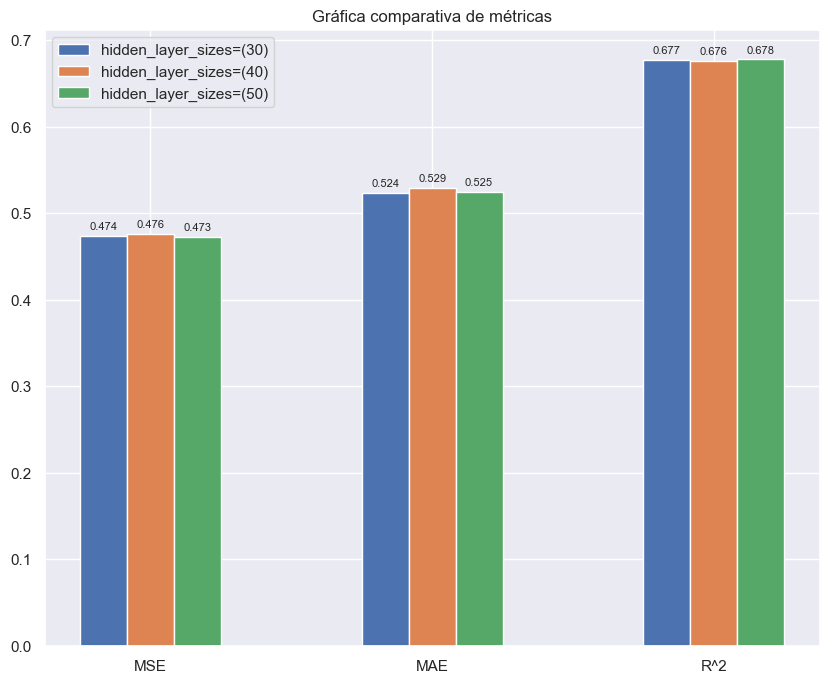

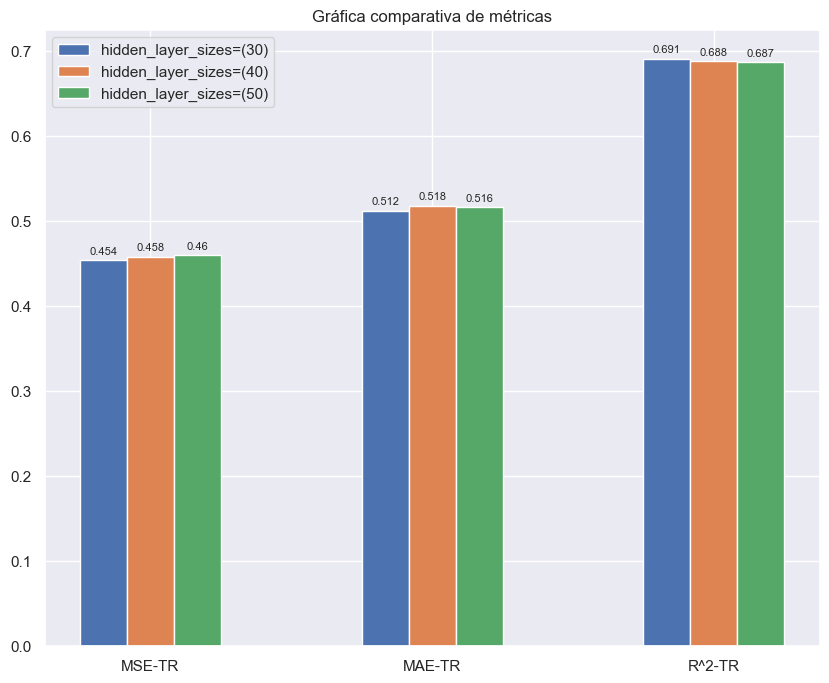

In [63]:
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(30), max_iter=500)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(50), max_iter=500)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['hidden_layer_sizes=(30)', 'hidden_layer_sizes=(40)', 'hidden_layer_sizes=(50)']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Nos quedamos con 30 neuronas.

**activation**

Porbaremos dos funciones de activación:

* 'relu' (Rectified Linear Unit): Esta es una de las funciones de activación más populares. Es una función no lineal que devuelve el valor de entrada si es positivo y 0 si es negativo. Es la que viene por defecto.

* 'tanh': Utiliza la función tangente hiperbólica como función de activación. La función tangente hiperbólica comprime la salida de las neuronas en el rango (-1, 1) y se utiliza comúnmente en problemas de regresión y clasificación.

╒═════════════════════╤═══════════════════╤═══════════════════╕
│ Métricas de error   │   activation=relu │   activation=tanh │
╞═════════════════════╪═══════════════════╪═══════════════════╡
│ MSE                 │          0.473395 │          0.467487 │
├─────────────────────┼───────────────────┼───────────────────┤
│ MAE                 │          0.526069 │          0.520468 │
├─────────────────────┼───────────────────┼───────────────────┤
│ R^2                 │          0.677635 │          0.681578 │
├─────────────────────┼───────────────────┼───────────────────┤
│ MSE-TR              │          0.448539 │          0.451824 │
├─────────────────────┼───────────────────┼───────────────────┤
│ MAE-TR              │          0.510947 │          0.511529 │
├─────────────────────┼───────────────────┼───────────────────┤
│ R^2-TR              │          0.694468 │          0.692268 │
╘═════════════════════╧═══════════════════╧═══════════════════╛


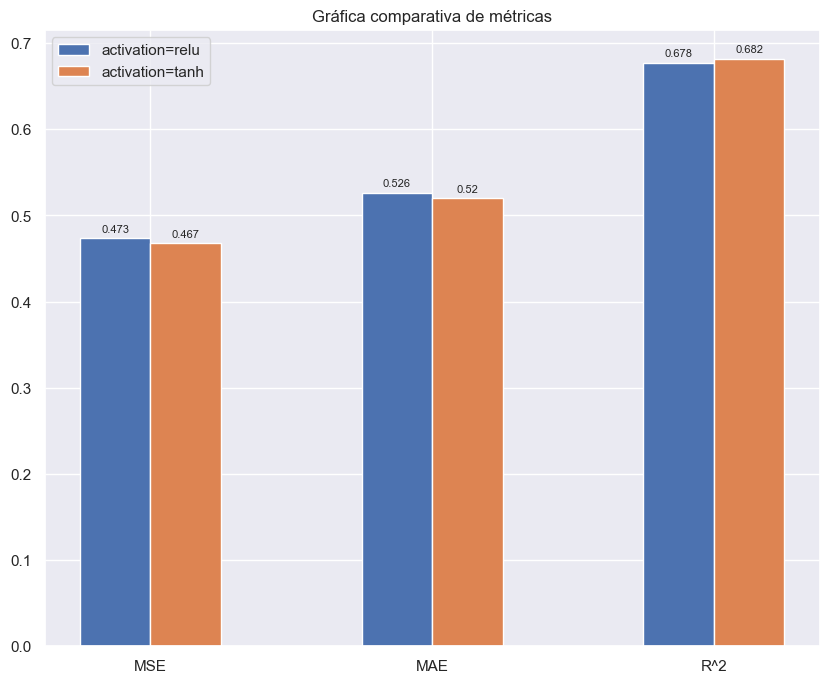

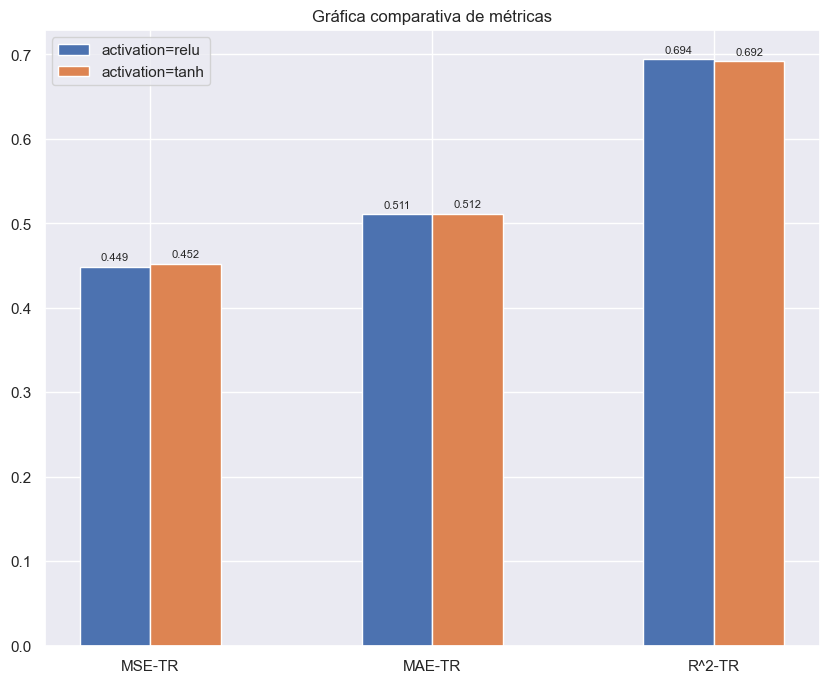

In [35]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(30), max_iter=500, activation='relu')
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(30), max_iter=500, activation='tanh')

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)

all_result = np.vstack((result1, result2))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['activation=relu', 'activation=tanh']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Con la tangente hiperbólica vemos que el sobreajuste se reduce bastante en comparación con 'relu', tal vez porque esta última sea demasiado compleja para nuestro problema, selecciono entonces la tangente hiperbólica.

**alpha**

Debido a los problemas de sobreajuste, la idea es aplicar una fuerte regularización al modelo, por lo que los valores a probar serán el valor por defecto (0.0001) y valores de magnitudes mayores.

╒═════════════════════╤════════════════╤═══════════════╤══════════════╤═════════════╤═══════════╕
│ Métricas de error   │   alpha=0.0001 │   alpha=0.001 │   alpha=0.01 │   alpha=0.1 │   alpha=1 │
╞═════════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╪═══════════╡
│ MSE                 │       0.467487 │      0.467838 │     0.47057  │    0.484995 │  0.535515 │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼───────────┤
│ MAE                 │       0.520468 │      0.520958 │     0.522868 │    0.532375 │  0.562037 │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼───────────┤
│ R^2                 │       0.681578 │      0.681342 │     0.679528 │    0.669726 │  0.635269 │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼───────────┤
│ MSE-TR              │       0.451824 │      0.452396 │     0.457202 │    0.477197 │  0.532441 │
├───────────────────

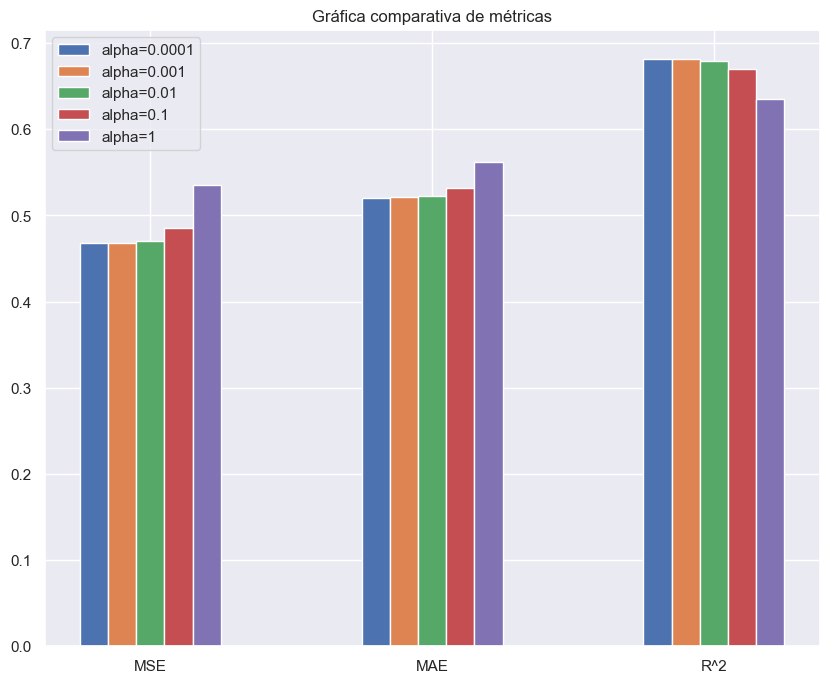

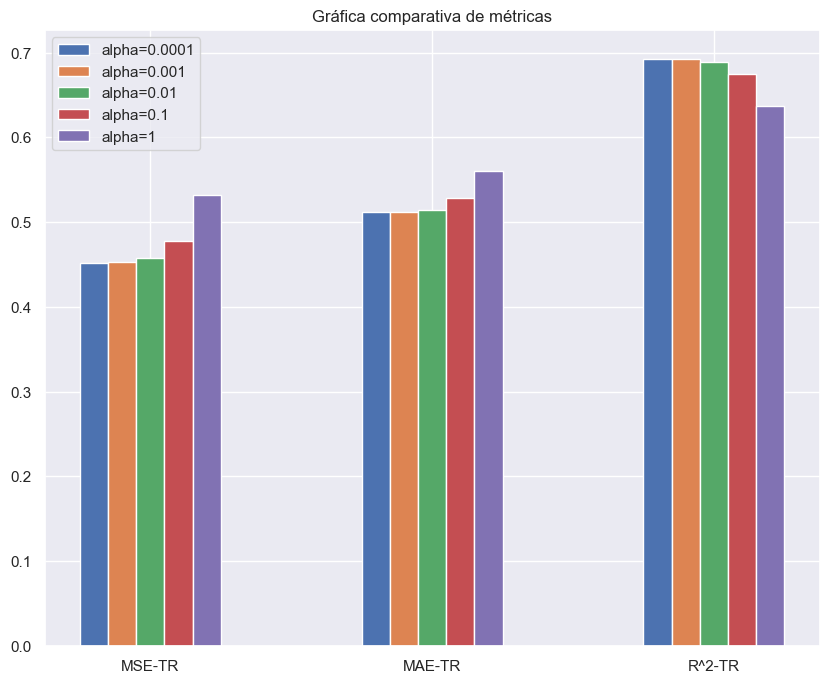

In [37]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500, activation='tanh', solver='adam', alpha=0.0001)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500, activation='tanh', solver='adam', alpha=0.001)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500, activation='tanh', solver='adam', alpha=0.01)
model_4 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500, activation='tanh', solver='adam', alpha=0.1)
model_5 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500, activation='tanh', solver='adam', alpha=1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)
result4 = crossValidation(model_4, kf, best_data, y_train_log, True)
result5 = crossValidation(model_5, kf, best_data, y_train_log, True)

all_result = np.vstack((result1, result2, result3, result4, result5))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['alpha=0.0001', 'alpha=0.001', 'alpha=0.01', 'alpha=0.1', 'alpha=1']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

A diferencia de anteriores pruebas aquí una mayor regularización no mejora los resultados, por lo que dejo el valor predeterminado.

**learning_rate_init**

Siendo el valor por defecto 0.001, probaré valores de magnitudes superiores a dicho valor, si no pruebo magnitudes inferiores es porque viendo los warning de que 1000 iteraciones no son suficientes para converger, un learning rate menor implicará más iteraciones aún y por tanto probablemente solo empeore los resultados.

╒═════════════════════╤════════════╤═══════════╤══════════╤═══════════╕
│ Métricas de error   │   lr=0.001 │   lr=0.01 │   lr=0.1 │      lr=1 │
╞═════════════════════╪════════════╪═══════════╪══════════╪═══════════╡
│ MSE                 │   0.467487 │  0.475364 │ 0.490694 │  1.75763  │
├─────────────────────┼────────────┼───────────┼──────────┼───────────┤
│ MAE                 │   0.520468 │  0.521842 │ 0.532526 │  1.07133  │
├─────────────────────┼────────────┼───────────┼──────────┼───────────┤
│ R^2                 │   0.681578 │  0.676067 │ 0.665919 │ -0.199552 │
├─────────────────────┼────────────┼───────────┼──────────┼───────────┤
│ MSE-TR              │   0.451824 │  0.455212 │ 0.46594  │  1.72755  │
├─────────────────────┼────────────┼───────────┼──────────┼───────────┤
│ MAE-TR              │   0.511529 │  0.510406 │ 0.519003 │  1.05952  │
├─────────────────────┼────────────┼───────────┼──────────┼───────────┤
│ R^2-TR              │   0.692268 │  0.690006 │ 0.682617 │ -0.1

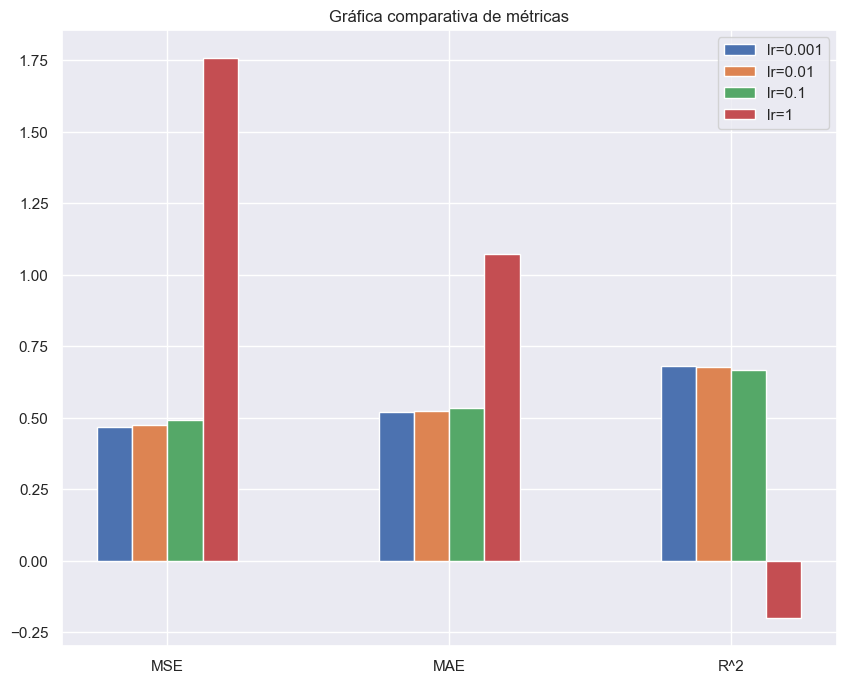

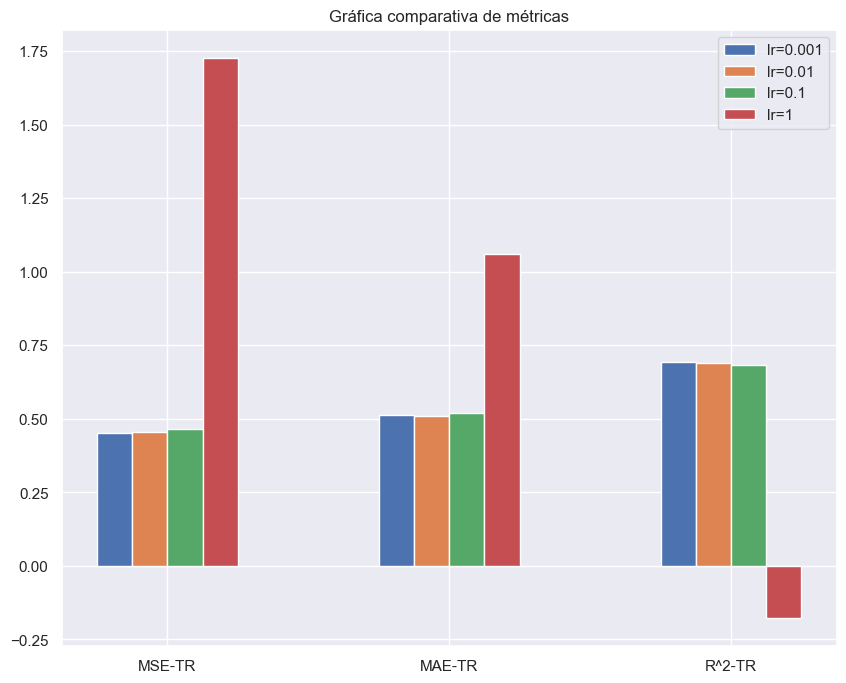

In [38]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500, activation='tanh', learning_rate_init=0.001)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500, activation='tanh', learning_rate_init=0.01)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500, activation='tanh', learning_rate_init=0.1)
model_4 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500, activation='tanh', learning_rate_init=1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)
result4 = crossValidation(model_4, kf, best_data, y_train_log, True)

all_result = np.vstack((result1, result2, result3, result4))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['lr=0.001', 'lr=0.01', 'lr=0.1', 'lr=1']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

De nuevo el valor por defecto es el que mejores resultados da.

### AdaBoost

AdaBoost es un estimador tipo ensemble, que comienza entrenando un modelo cualquiera con el dataset original para posteriormente entrenar copias del estimador inicial con el mismo dataset, pero modificando los pesos adecuándose al error de las predicciones actuales.

**n_estimators**

El máximo número de estimadores antes de que el boosting finalice.

╒═════════════════════╤═════════════════════╤═════════════════════╤══════════════════════╕
│ Métricas de error   │   n_estimators = 25 │   n_estimators = 50 │   n_estimators = 100 │
╞═════════════════════╪═════════════════════╪═════════════════════╪══════════════════════╡
│ MSE                 │            0.603797 │            0.621339 │             0.635819 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ MAE                 │            0.616869 │            0.629208 │             0.639969 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ R^2                 │            0.588415 │            0.576338 │             0.566244 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ MSE-TR              │            0.575219 │            0.593385 │             0.609496 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┤

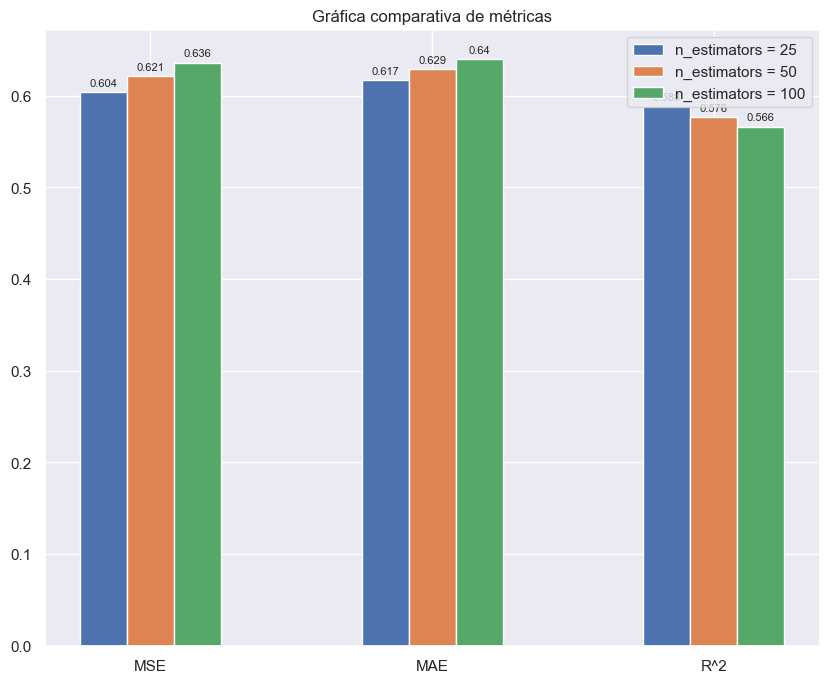

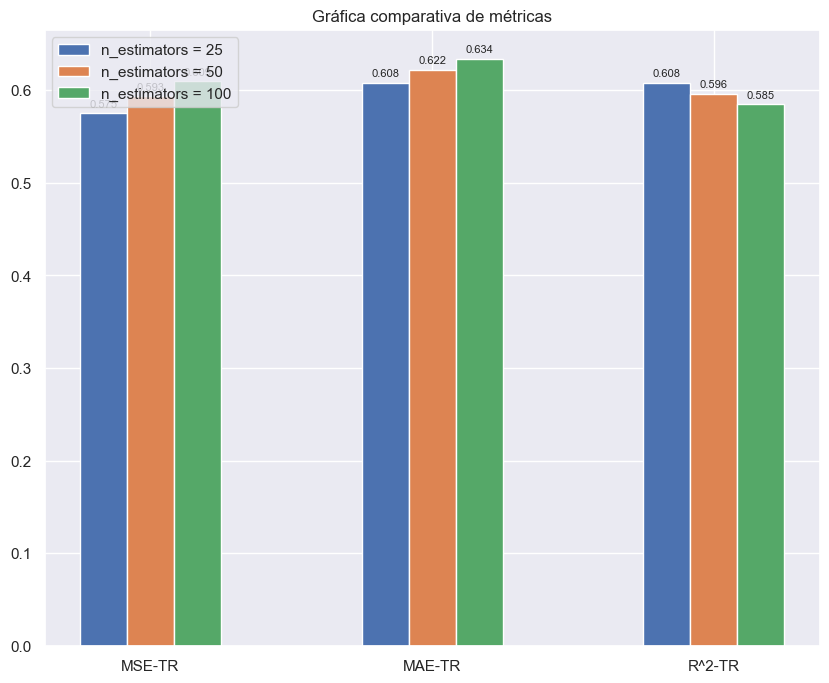

In [44]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = AdaBoostRegressor(random_state=34, n_estimators=25)
model_2 = AdaBoostRegressor(random_state=34, n_estimators=50)
model_3 = AdaBoostRegressor(random_state=34, n_estimators=100)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, best_data, y_train_log, True)
result2 = crossValidation(model_2, kf, best_data, y_train_log, True)
result3 = crossValidation(model_3, kf, best_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['n_estimators = 25', 'n_estimators = 50', 'n_estimators = 100']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Vemos que con menos estimadores obtenemos mejores resultados, esto puede deberse a que al penalizar los errores iniciales empeore el entrenamiento a posteriori, me quedaré con el menor número de estimadores en todo caso.

**loss**

Función de pérdida usada cuando se actualizan los pesos.

╒═════════════════════╤═══════════════╤═══════════════╤════════════════════╕
│ Métricas de error   │   loss=linear │   loss=square │   loss=exponential │
╞═════════════════════╪═══════════════╪═══════════════╪════════════════════╡
│ MSE                 │      0.603797 │      0.646401 │           0.592032 │
├─────────────────────┼───────────────┼───────────────┼────────────────────┤
│ MAE                 │      0.616869 │      0.642906 │           0.609386 │
├─────────────────────┼───────────────┼───────────────┼────────────────────┤
│ R^2                 │      0.588415 │      0.55957  │           0.596527 │
├─────────────────────┼───────────────┼───────────────┼────────────────────┤
│ MSE-TR              │      0.575219 │      0.614492 │           0.563064 │
├─────────────────────┼───────────────┼───────────────┼────────────────────┤
│ MAE-TR              │      0.607516 │      0.633704 │           0.599375 │
├─────────────────────┼───────────────┼───────────────┼────────────────────┤

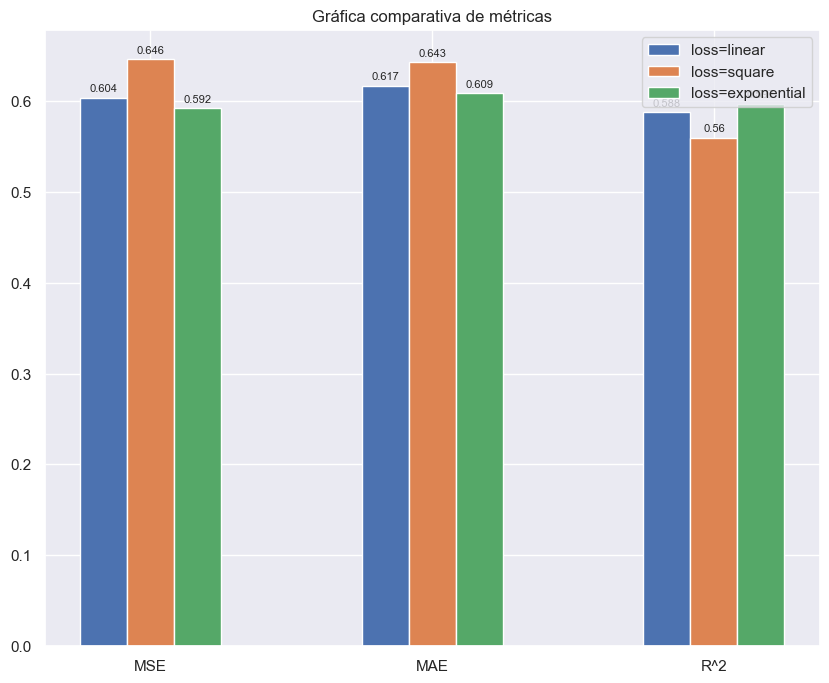

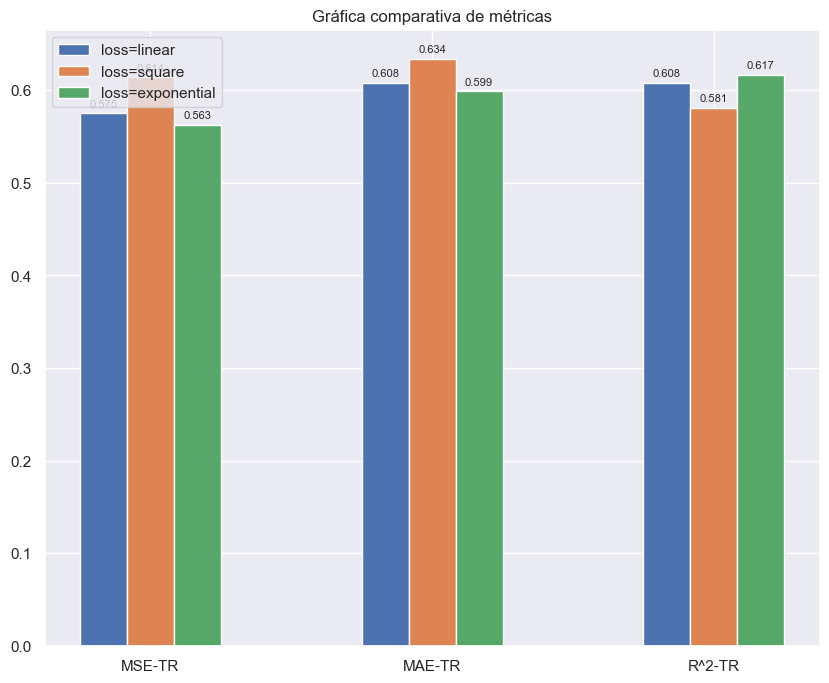

In [45]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = AdaBoostRegressor(random_state=34, n_estimators=25, loss='linear')
model_2 = AdaBoostRegressor(random_state=34, n_estimators=25, loss='square')
model_3 = AdaBoostRegressor(random_state=34, n_estimators=25, loss='exponential')

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, LVW_data, y_train_log, True)
result2 = crossValidation(model_2, kf, LVW_data, y_train_log, True)
result3 = crossValidation(model_3, kf, LVW_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['loss=linear', 'loss=square', 'loss=exponential']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

### Comparamos todos los modelos

╒═════════════════════╤══════════╤══════════╤════════════╤══════════╕
│ Métricas de error   │       RF │      MLP │   AdaBoost │       GB │
╞═════════════════════╪══════════╪══════════╪════════════╪══════════╡
│ MSE                 │ 0.454442 │ 0.467487 │   0.448129 │ 0.43882  │
├─────────────────────┼──────────┼──────────┼────────────┼──────────┤
│ MAE                 │ 0.507408 │ 0.520468 │   0.515529 │ 0.498989 │
├─────────────────────┼──────────┼──────────┼────────────┼──────────┤
│ R^2                 │ 0.69039  │ 0.681578 │   0.694659 │ 0.701061 │
├─────────────────────┼──────────┼──────────┼────────────┼──────────┤
│ MSE-TR              │ 0.063939 │ 0.451824 │   0.271938 │ 0.327526 │
├─────────────────────┼──────────┼──────────┼────────────┼──────────┤
│ MAE-TR              │ 0.189313 │ 0.511529 │   0.433409 │ 0.436385 │
├─────────────────────┼──────────┼──────────┼────────────┼──────────┤
│ R^2-TR              │ 0.956451 │ 0.692268 │   0.814777 │ 0.776922 │
╘═══════════════════

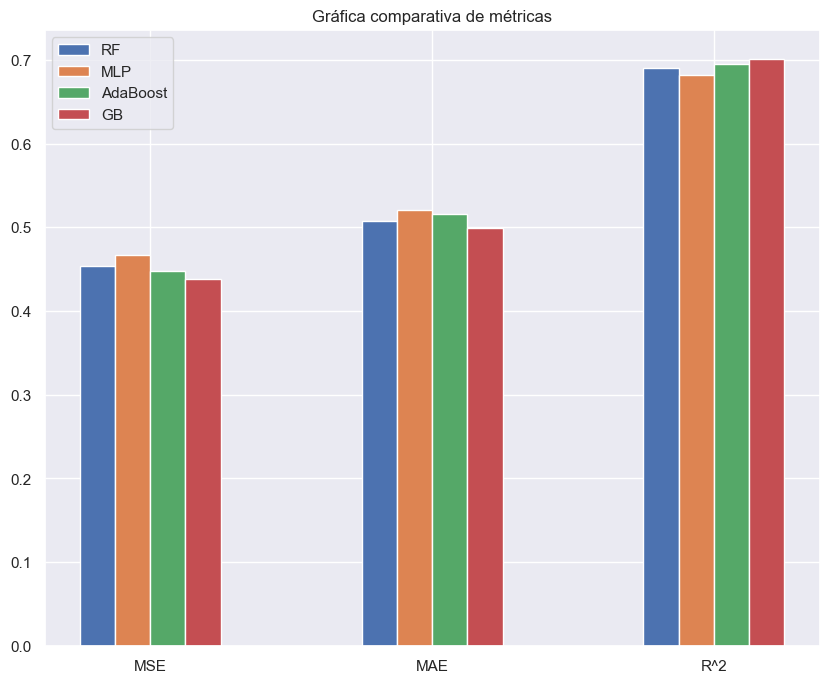

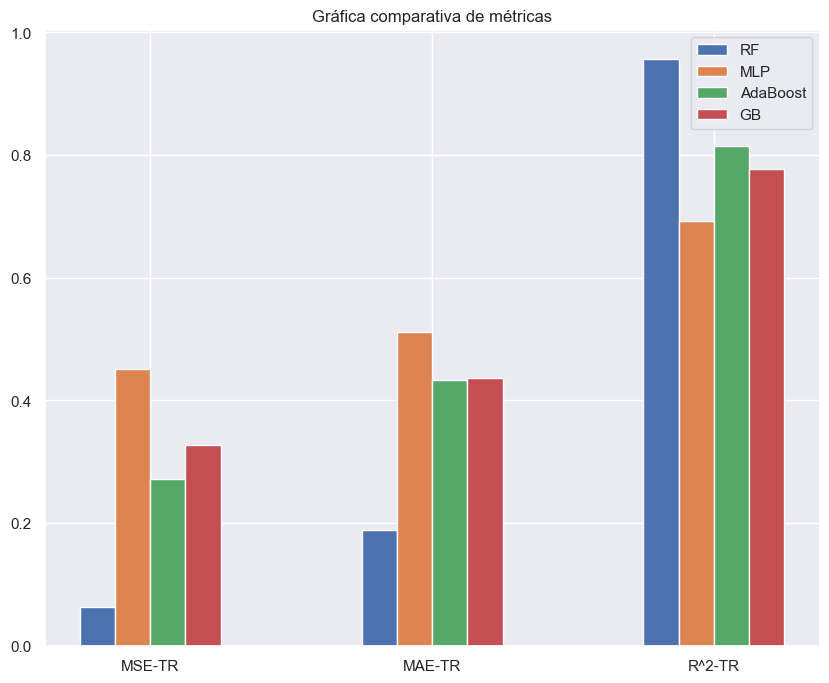

In [47]:
model_1 = RandomForestRegressor(n_estimators = 100, max_depth=23, random_state=34, n_jobs=-1)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(40), max_iter=500, activation='tanh', learning_rate_init=0.001)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34, learning_rate=0.23701803337459112, max_depth=4, alpha=0.99999)
model_3 = AdaBoostRegressor(random_state=34, n_estimators=25, loss='exponential', estimator=model_4) # Uso GB como estimador base

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, LVW_data, y_train_log, True)
result2 = crossValidation(model_2, kf, LVW_data, y_train_log, True)
result3 = crossValidation(model_3, kf, LVW_data, y_train_log, True)
result4 = crossValidation(model_4, kf, LVW_data, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['RF', "MLP", 'AdaBoost', 'GB']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Concluimos en que Graddient Boosting es el mejor modelo.

# Resultados de test/Ver la importancia de las características

### Resultados en test

In [57]:
# Mejor solución
lvw_sol = np.array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
					0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
					0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
					0, 1, 1, 0, 1, 1, 0])

LVW_data = (x_train[x_train.columns[lvw_sol==1]]).to_numpy()
LVW_test = (x_test[x_test.columns[lvw_sol==1]]).to_numpy()

In [61]:
model = GradientBoostingRegressor(loss='huber', n_estimators = 100, random_state=34, learning_rate=0.23701803337459112, max_depth=4, alpha=0.99999)

# Entrenamos con todo el conjunto de entrenamiento
model.fit(LVW_data, y_train_log)

# Evaluar el desempeño del modelo en el conjunto de test
pred_y = model.predict(LVW_test)

# Calcular el MSE 
mse = mean_squared_error(y_test_log, pred_y)

# Calcular el MAE 
mae = mean_absolute_error(y_test_log, pred_y)

# Calcular el Coeficiente de determinación
r2 = r2_score(y_test_log, pred_y)

print('MSE: ', mse)
print('MAE: ', mae)
print('R^2 score: ', r2)

MSE:  0.4577101076028473
MAE:  0.4999994483073857
R^2 score:  0.7031094461222607


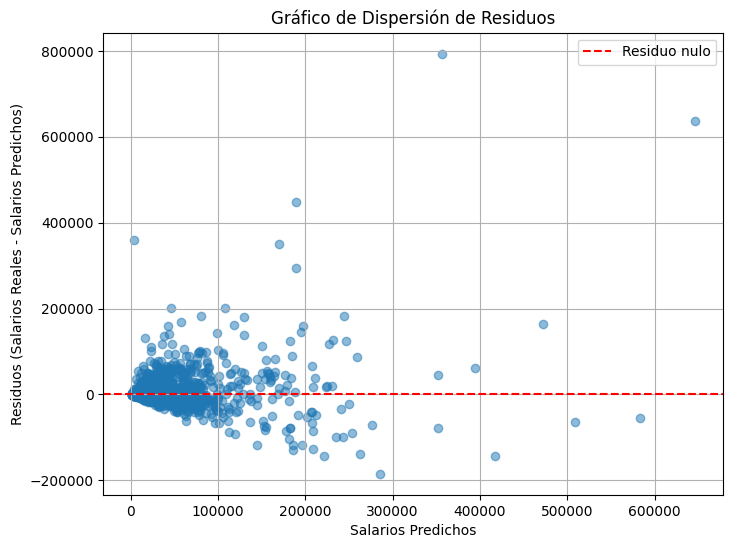

Salarios sobreestimados:
320

Salarios infraestimados:
300

Salarios normales:
459


In [34]:
y_pred_ori = np.expm1(pred_y)
y_test = np.expm1(y_test_log)

# Calcula los residuos
residuos = y_test - y_pred_ori

# Crea un gráfico de dispersión de los residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ori, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', label='Residuo nulo')
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Salarios Predichos')
plt.ylabel('Residuos (Salarios Reales - Salarios Predichos)')
plt.grid(True)
plt.legend()
plt.show()

# Identifica salarios sobreestimados e infraestimados
porcentaje_error = 0.3
error = porcentaje_error * y_test

salarios_sobreestimados = y_test[residuos < -error]
salarios_infraestimados = y_test[residuos > error]
salarios_normales = y_test[(residuos <= error) & (residuos >= -error)]

print("Salarios sobreestimados:")
print(salarios_sobreestimados.shape[0])

print("\nSalarios infraestimados:")
print(salarios_infraestimados.shape[0])

print("\nSalarios normales:")
print(salarios_normales.shape[0])

### Peso de las características en la predicción

In [45]:
# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Obtener los nombres de las características
features = x_test[x_test.columns[lvw_sol==1]]
feature_names = features.columns

# Crear un diccionario con los nombres de las características y su importancia
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Imprimir las importancias de las características
for feature_name, importance in feature_importance_dict.items():
    print(f"{feature_name}: {importance}")

Edad: 0.17347265575990115
Partidos: 0.023495823366454803
xG sin penaltis: 0.01583586757310462
Disparos recibidos: 0.002541583308551483
Salvadas: 0.0009720267559359643
Penaltis fallados (en contra): 1.4626503537568079e-05
2a amarilla: 0.000325552374624732
Balones centrados: 0.0027038713522128644
Entradas ganadas: 0.004094856736412026
Goles en propia: 0.0005552742025808563
Disparos: 0.027395729214030252
Tiros a puerta: 0.011194816231113283
Faltas lanzadas: 0.0035467340991175416
Distancia pases: 0.006990787905350105
Pases cortos completados: 0.010735991156917712
Pases cortos intentados: 0.023957600705200244
Pases medios completados: 0.003297031535868818
Pases largos completados: 0.009028014727154783
Pases largos intentados: 0.0053128633074841745
Toques: 0.037706030950585195
Controles: 0.011986838176700645
Conducciones en area: 0.006932747405865815
Valor liga fin: 0.050446971812151985
Posicion liga ini: 0.006183176555372921
Valor equipo ini: 0.19799053939916336
Valor equipo fin: 0.36035478

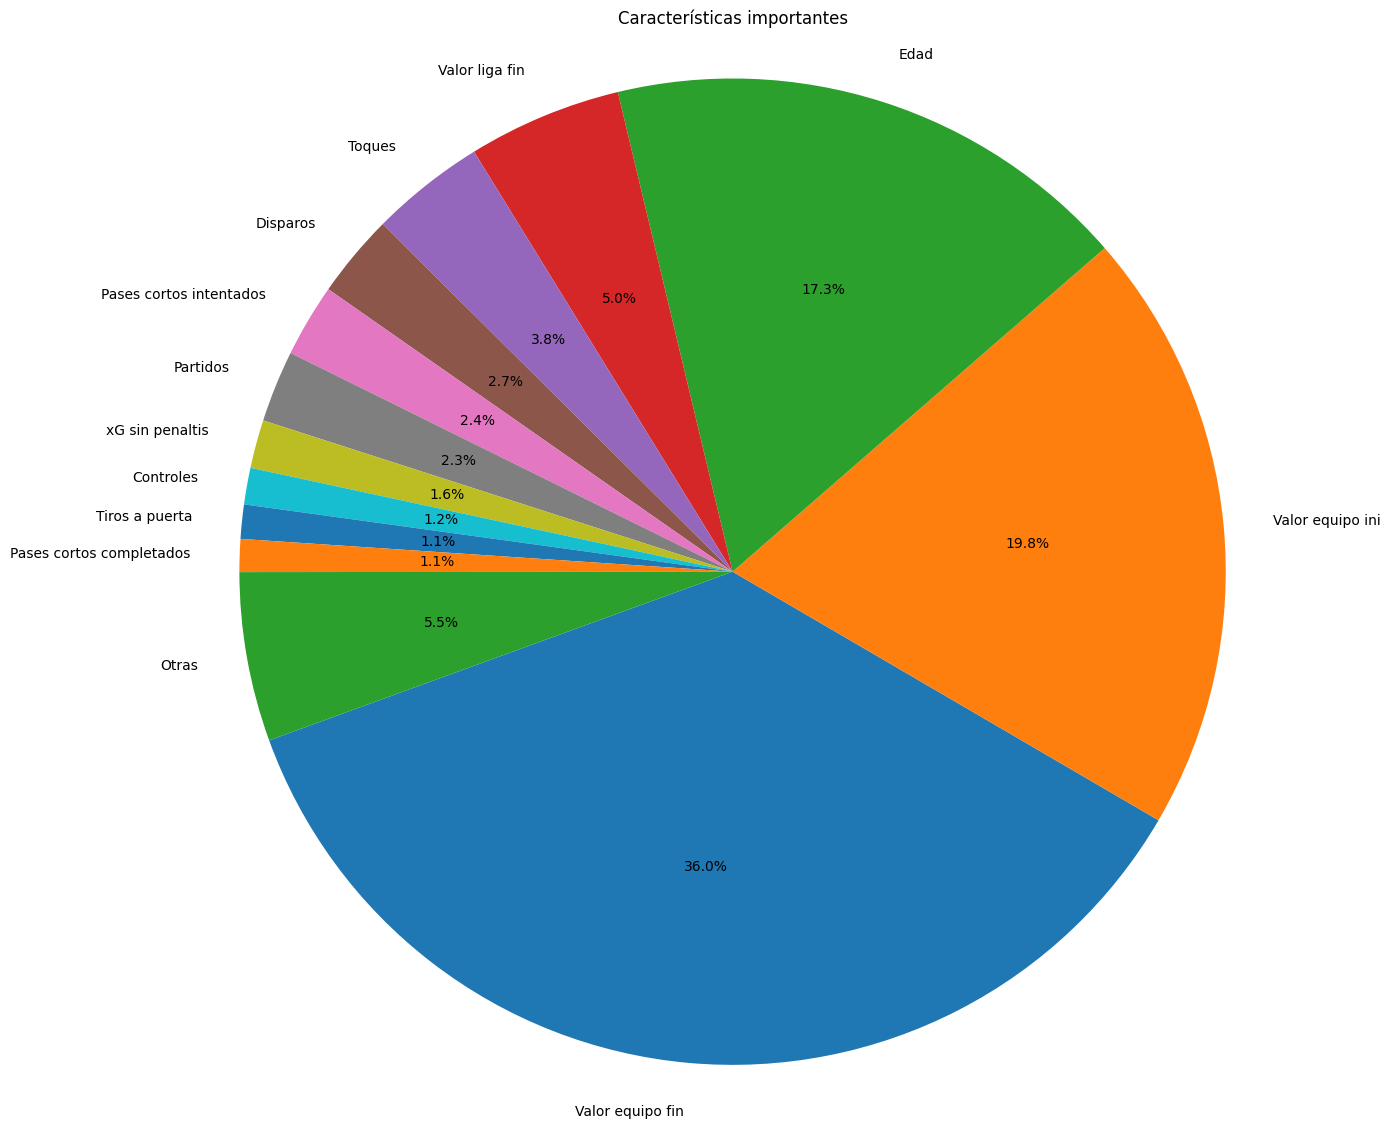

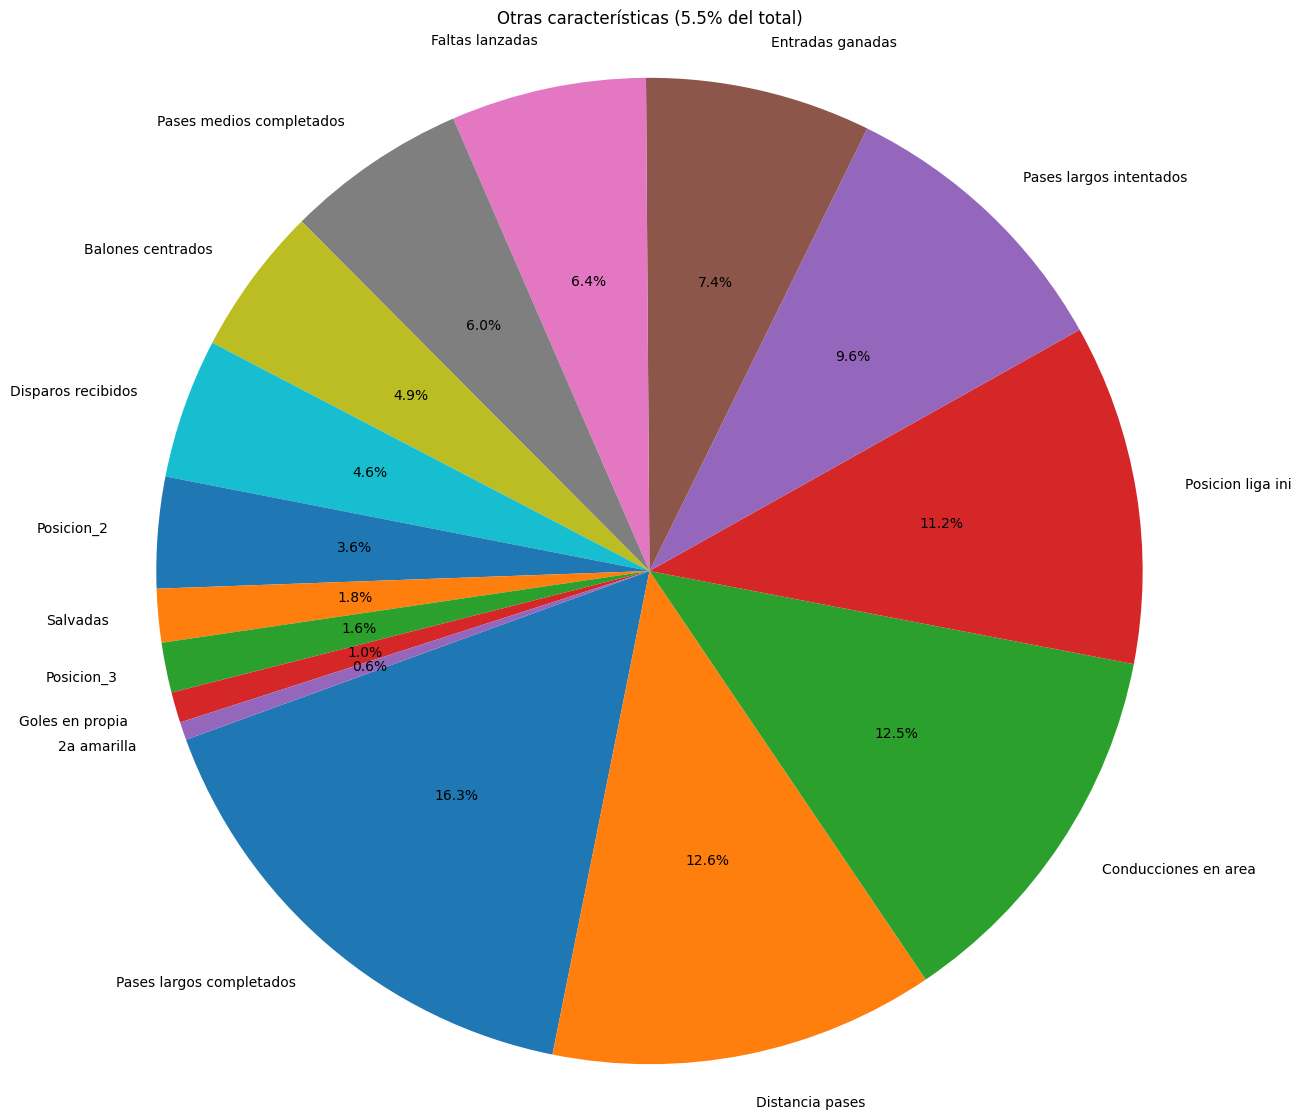

In [66]:
# Ordenar las características por importancia
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Separar las características en dos grupos: una con más del 1% de importancia y otra con menos del 1%
important_features = {k: v for k, v in sorted_feature_importance if v >= 0.01}
other_features = {k: v for k, v in sorted_feature_importance if v < 0.01 and v > 0.0001}

# Calcular la importancia total de las características menos importantes
other_importance = sum(other_features.values())

# Agrupar las características menos importantes bajo un solo nombre
important_features['Otras'] = other_importance

# Preparar los datos para el gráfico de características importantes
labels_imp = list(important_features.keys())
sizes_imp = list(important_features.values())

# Preparar los datos para el gráfico de características menos importantes
labels_other = list(other_features.keys())
sizes_other = list(other_features.values())

# Crear el gráfico de características importantes
plt.figure(figsize=(14, 14))
plt.pie(sizes_imp, labels=labels_imp, autopct='%1.1f%%', startangle=200)
plt.axis('equal')  
plt.title('Características importantes')
plt.show()

# Crear el gráfico de características menos importantes
plt.figure(figsize=(14, 14))
plt.pie(sizes_other, labels=labels_other, autopct='%1.1f%%', startangle=200)
plt.axis('equal')  
plt.title('Otras características (5.5% del total)')
plt.show()